In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%run ..\..\..\funcoes_base_global\funcoes_plot.py

In [4]:
input_path  = os.path.join('..','1_preprocessamento','out','')
output_path = os.path.join('out','')
if not os.path.exists(output_path): 
    os.mkdir(output_path)

In [3]:
tags_temp =    {'302B':['TI3501.PV', 'TI3502.PV', 'TI3503.PV', 'TI3504.PV', 'TI3509.PV', 'TI3511A.PV', 'TI3511B.PV', 'TI3511C.PV', 'TI3512A.PV', 'TI3512B.PV', 'TI3510.PV'],
                '302A':['TI2401.PV', 'TI2601.PV', 'TI3401.PV', 'TI3402.PV', 'TI3403.PV', 'TI3404.PV', 'TI3405.PV', 'TI3406.PV', 'TI3407.PV', 'TI3408.PV', 'TI3409.PV', 'TI3410.PV', 'TI3411A.PV', 'TI3411B.PV', 'TI3411C.PV', 'TI3412A.PV', 'TI3412B.PV'],
                '301B':[],
                '301A':[]}

In [9]:
df = pd.read_csv(input_path+'df_temp.csv.gz', compression = 'gzip')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TI2401.PV,TI2401.PV_quality,TI2601.PV,TI2601.PV_quality,TI3401.PV,TI3401.PV_quality,TI3402.PV,TI3402.PV_quality,TI3403.PV,TI3403.PV_quality,...,TI3411A.PV,TI3411A.PV_quality,TI3411B.PV,TI3411B.PV_quality,TI3411C.PV,TI3411C.PV_quality,TI3412A.PV,TI3412A.PV_quality,TI3412B.PV,TI3412B.PV_quality
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualização de Dados Nulos

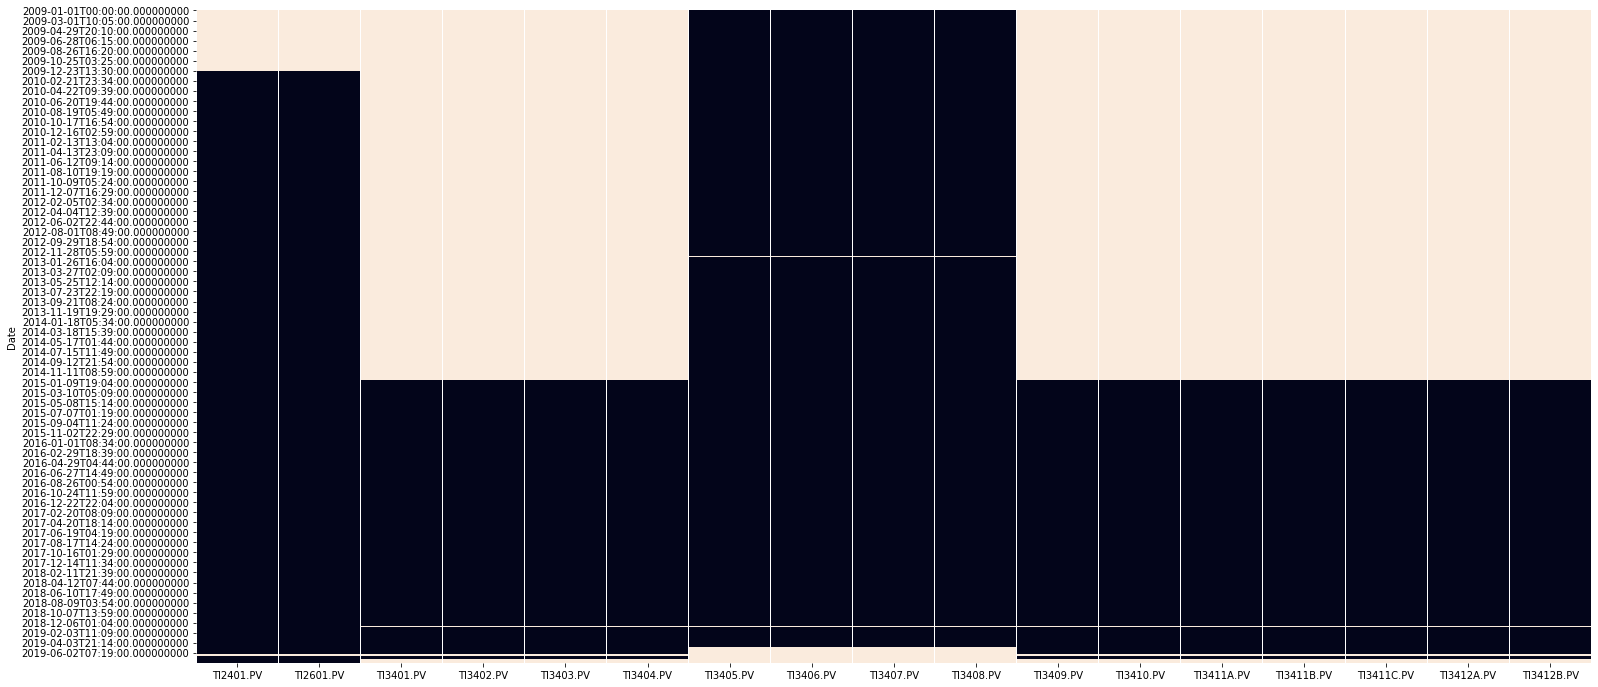

In [5]:
plt.figure(figsize = [25,12])
sns.heatmap(df[tags_temp['302A']].isnull(), cbar = False)

#### Visualização Temporal

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


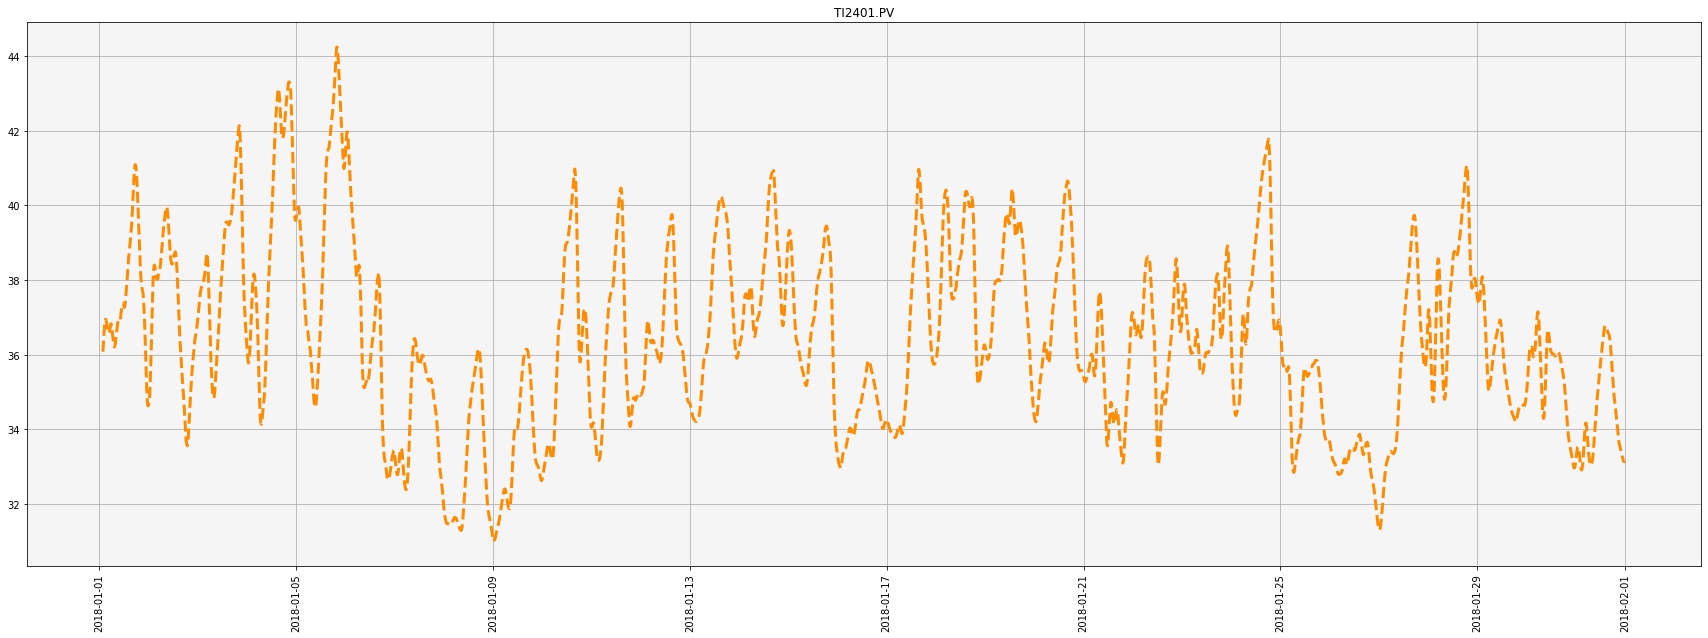

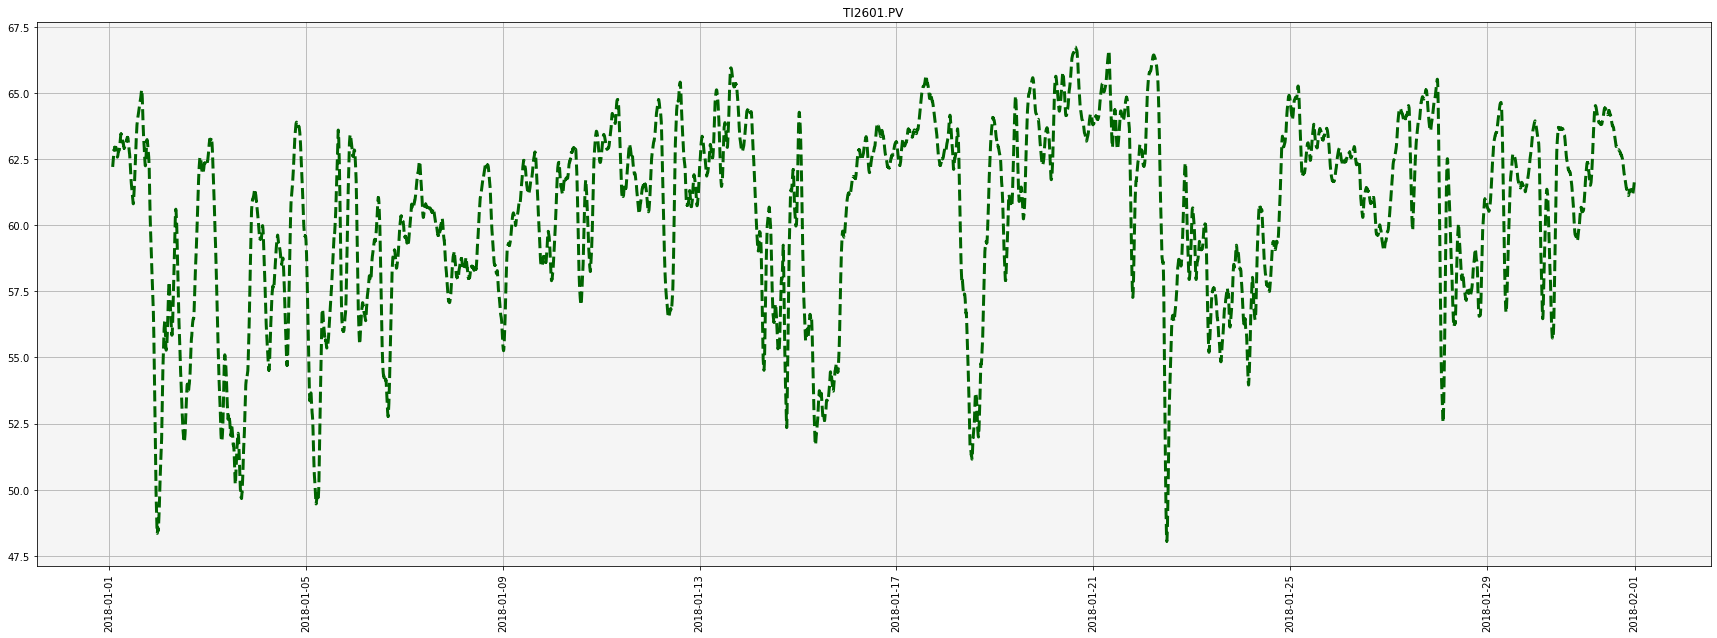

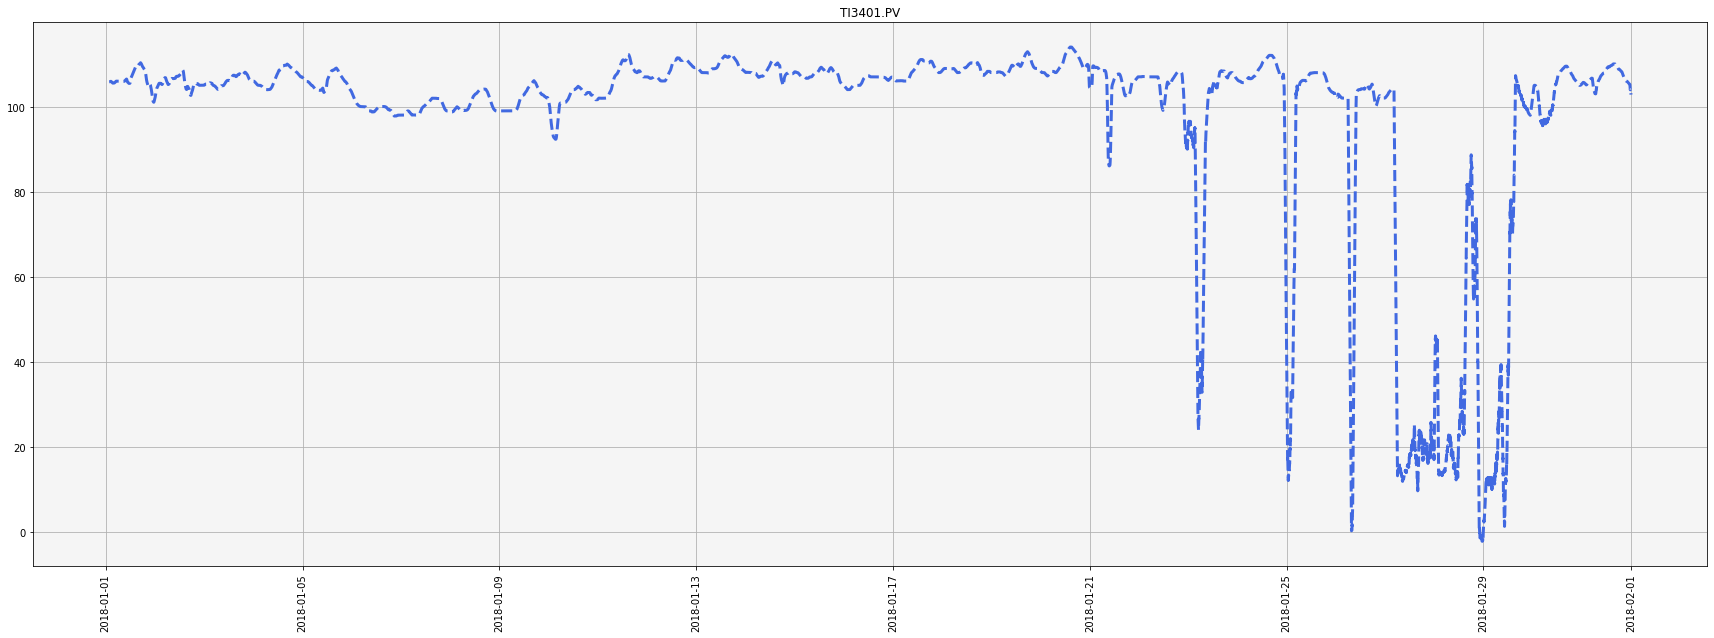

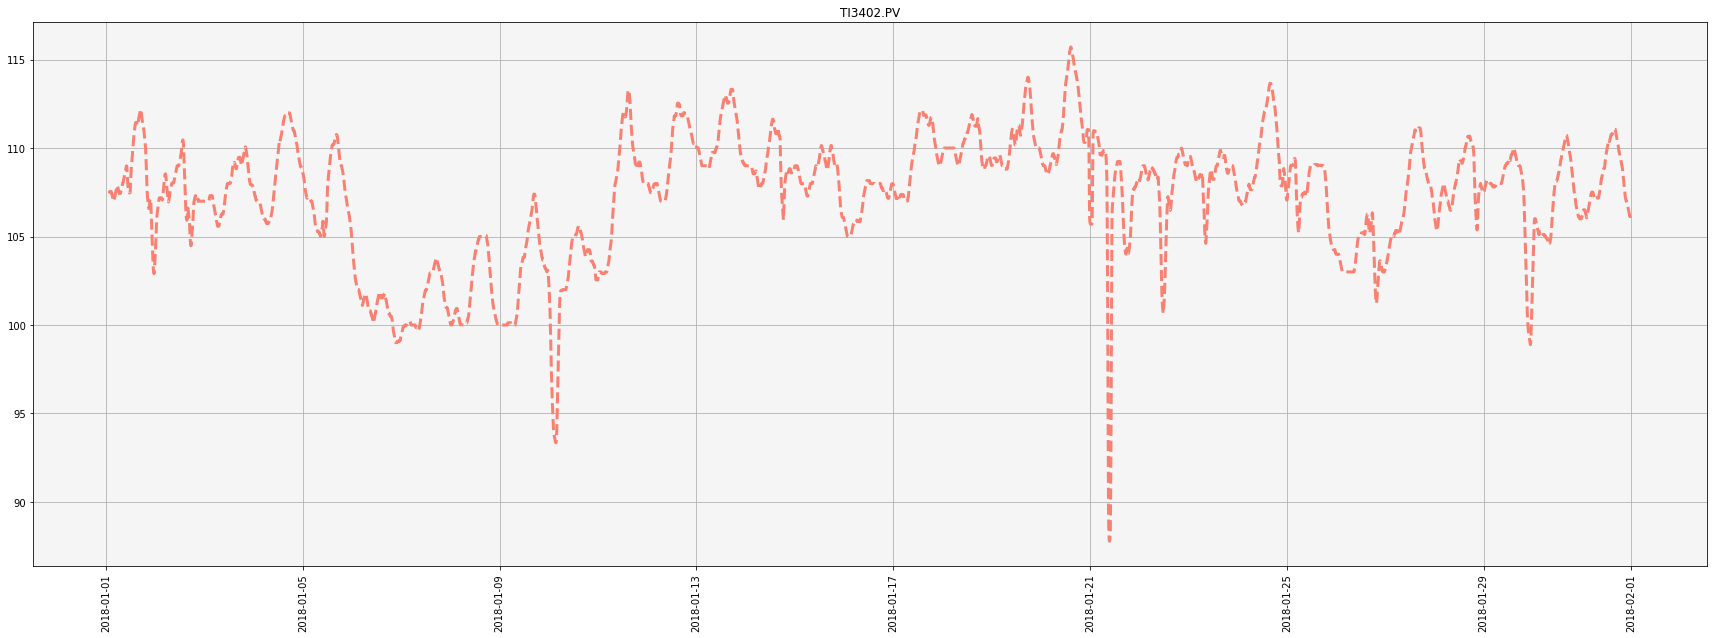

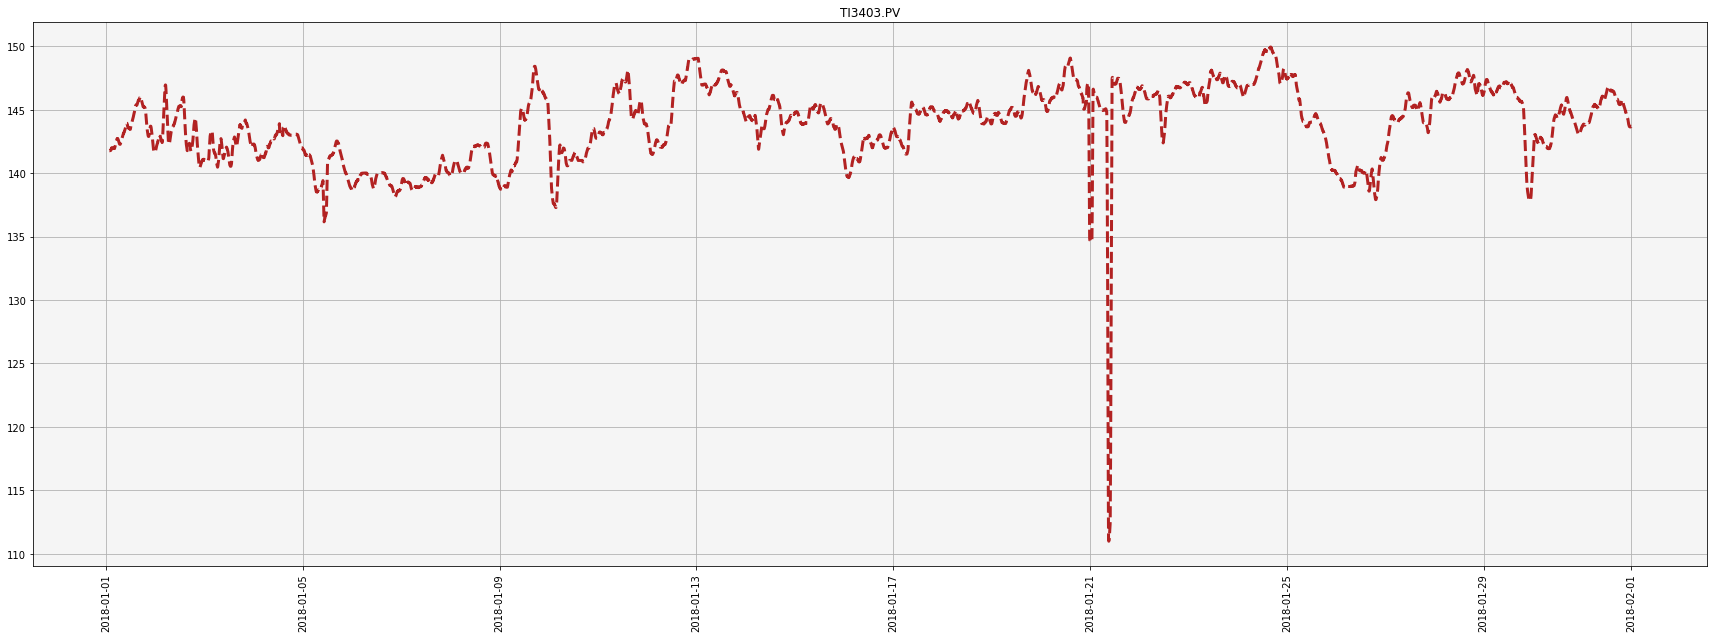

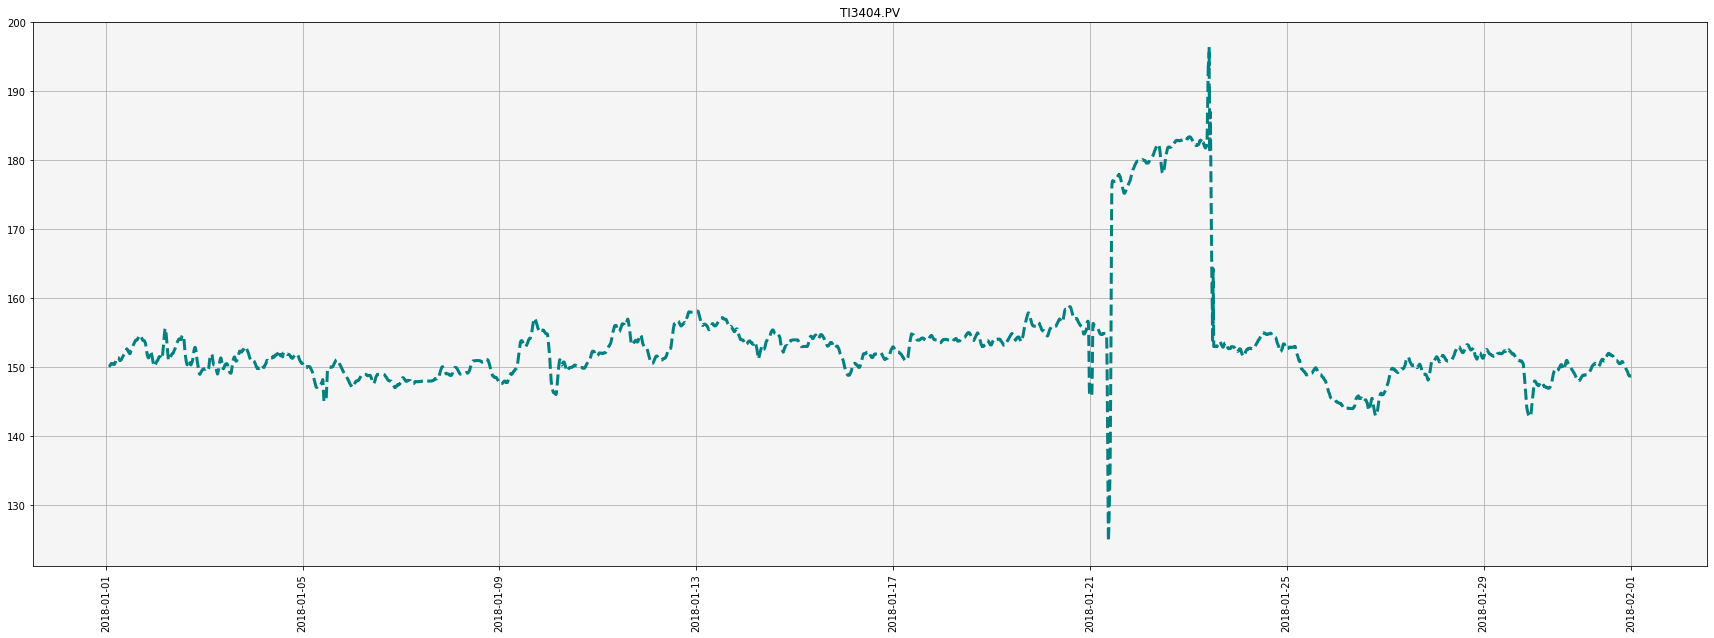

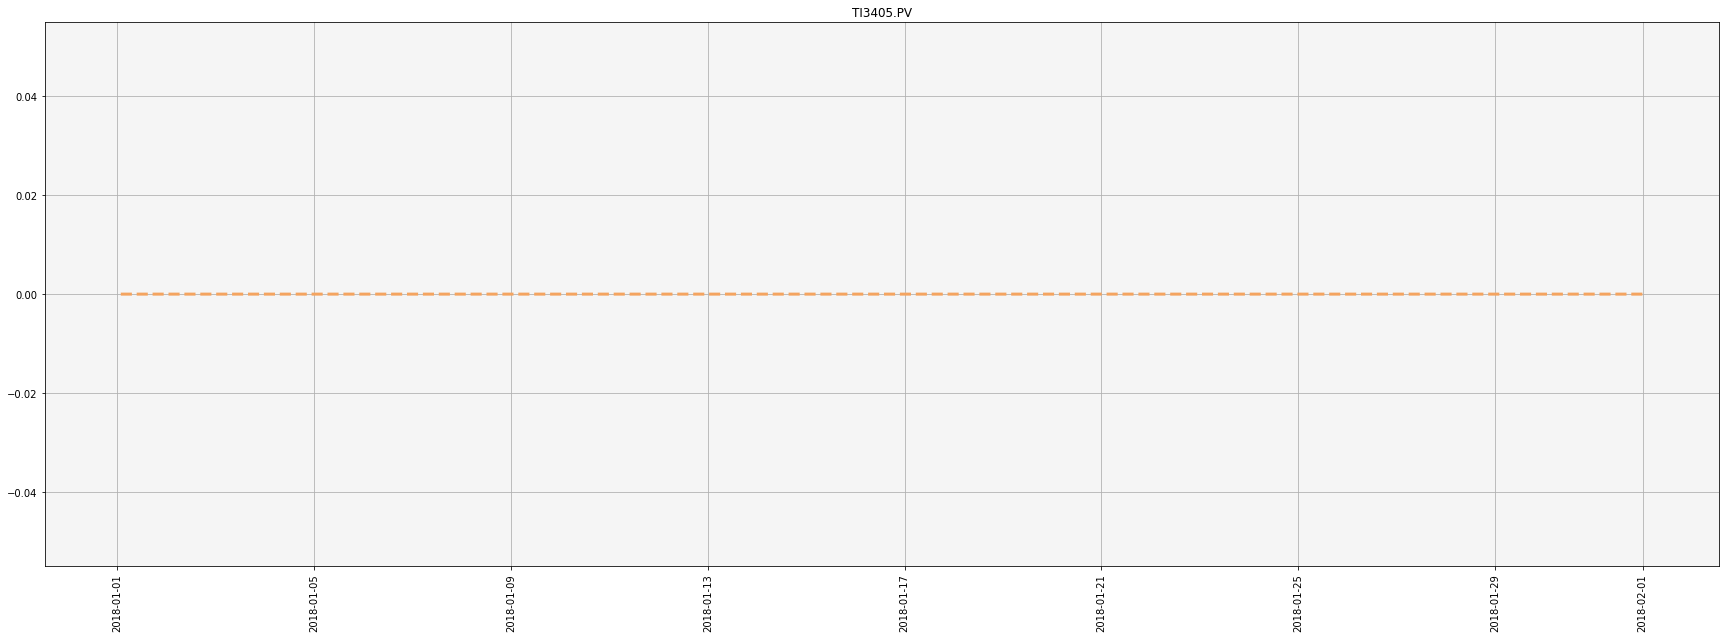

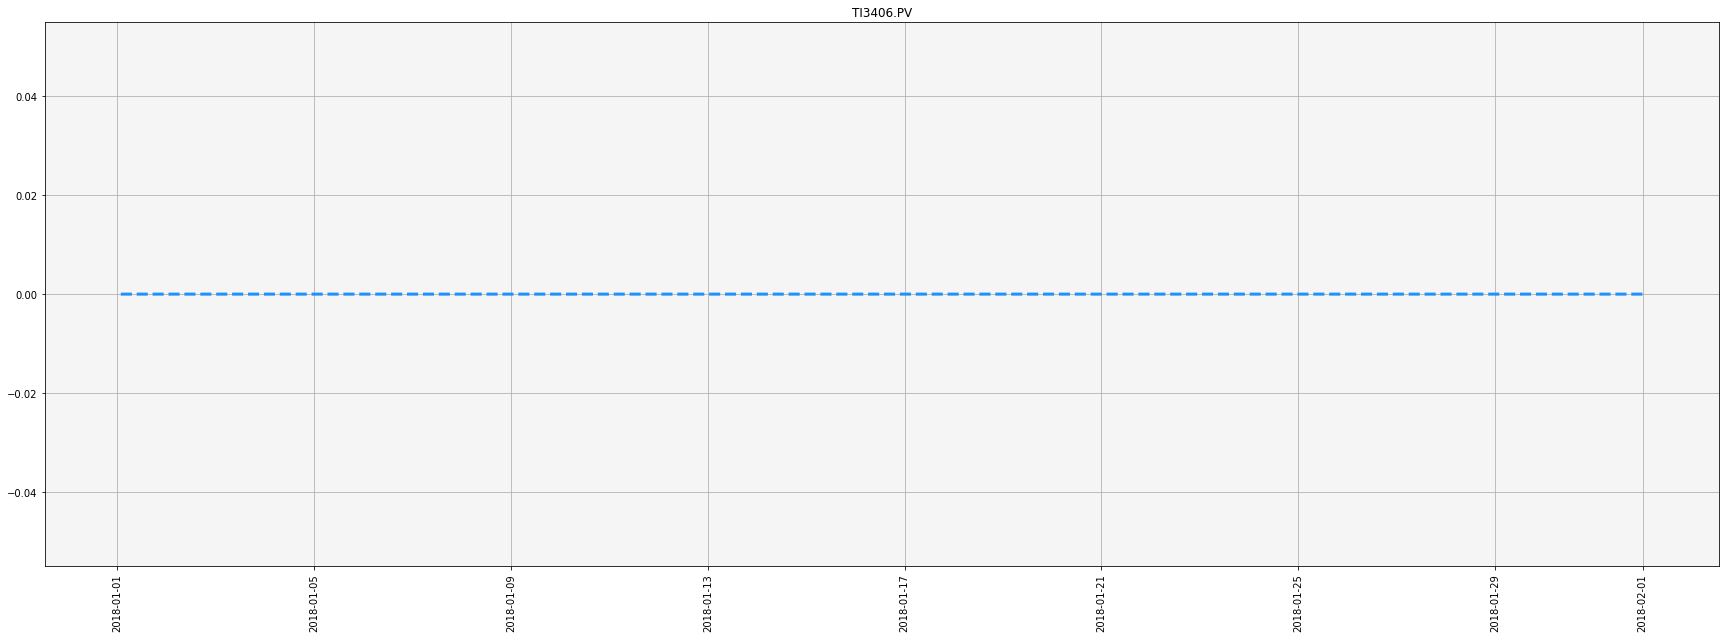

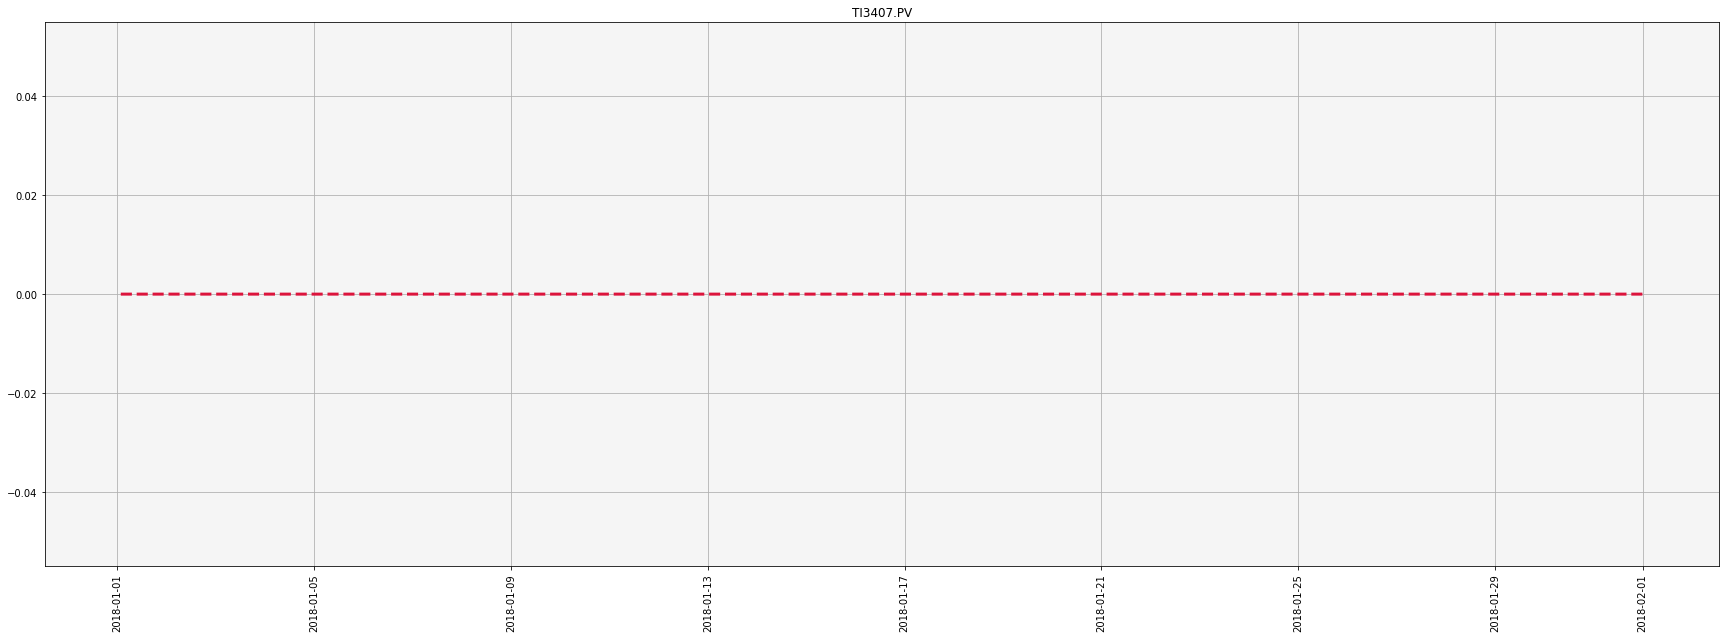

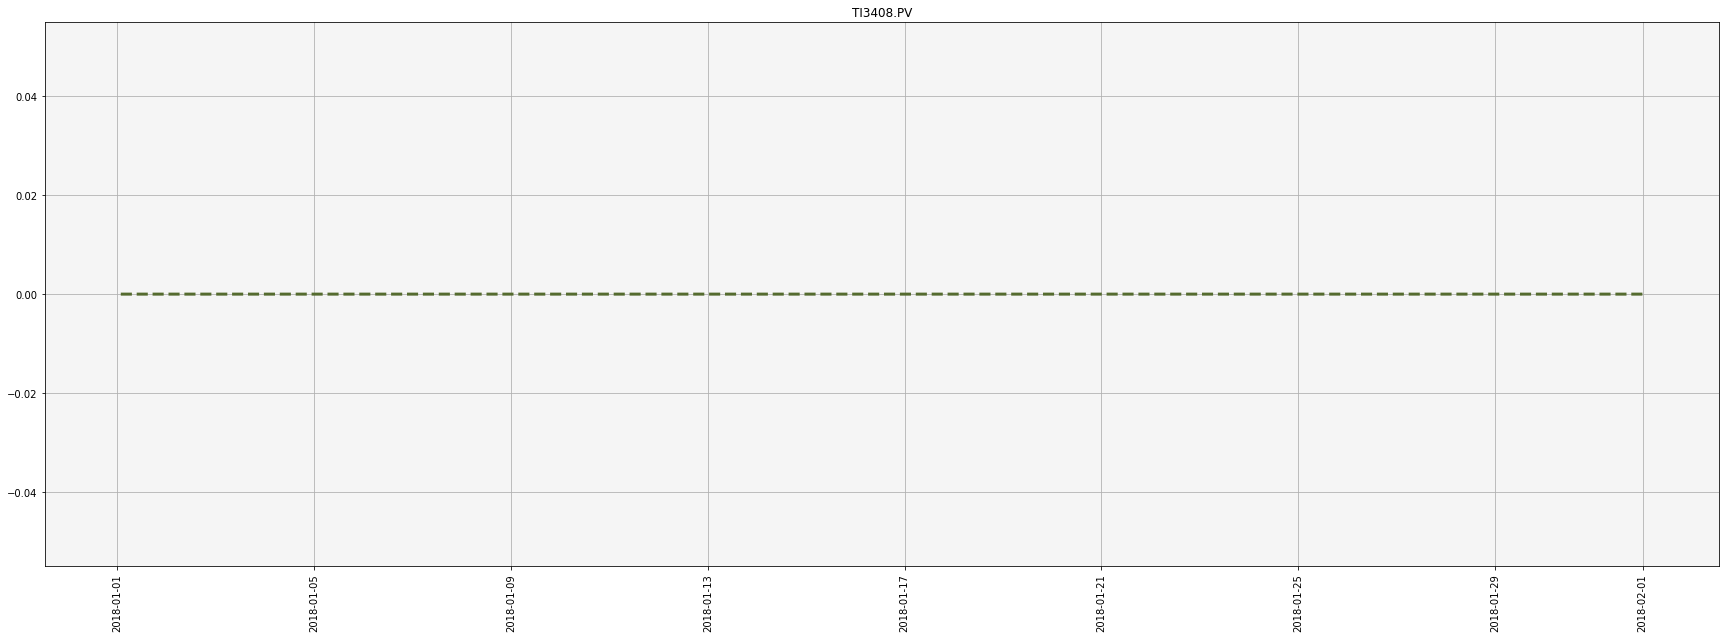

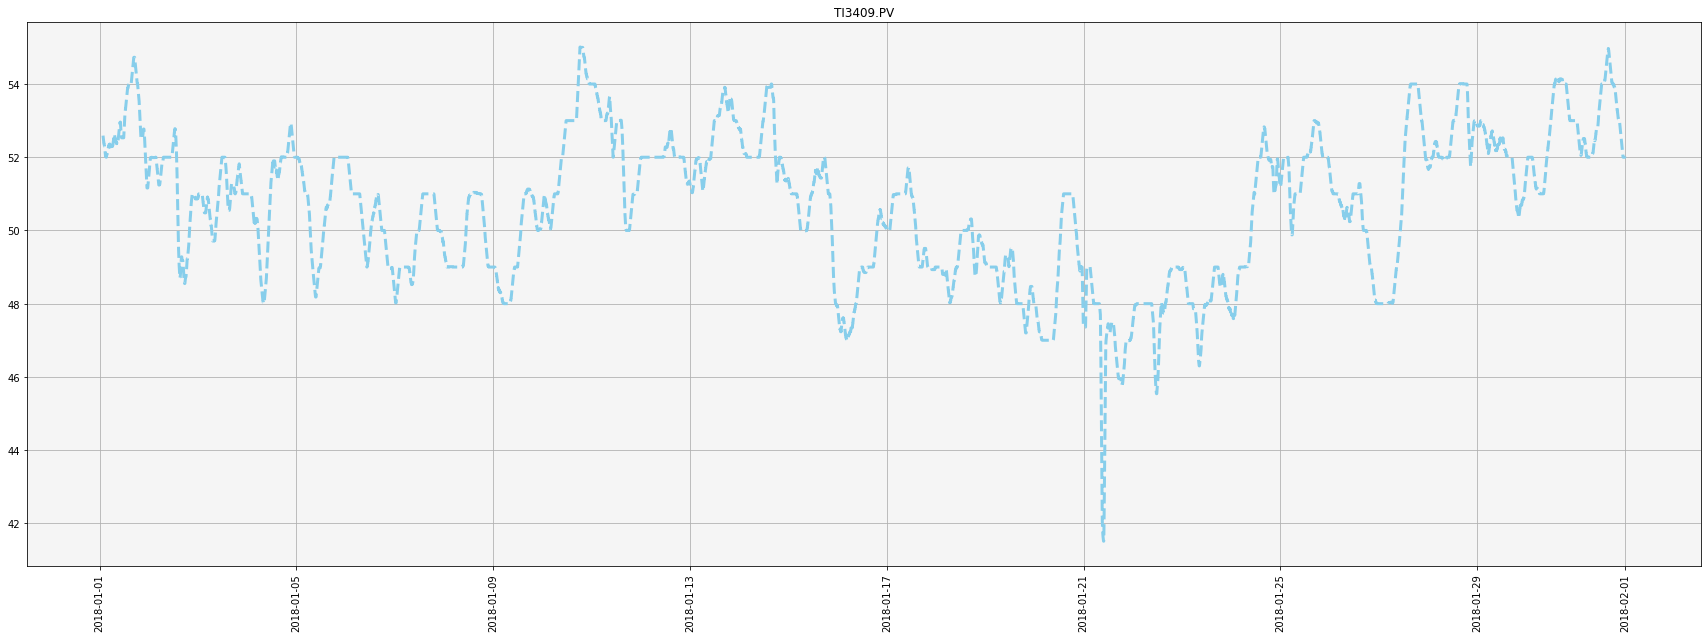

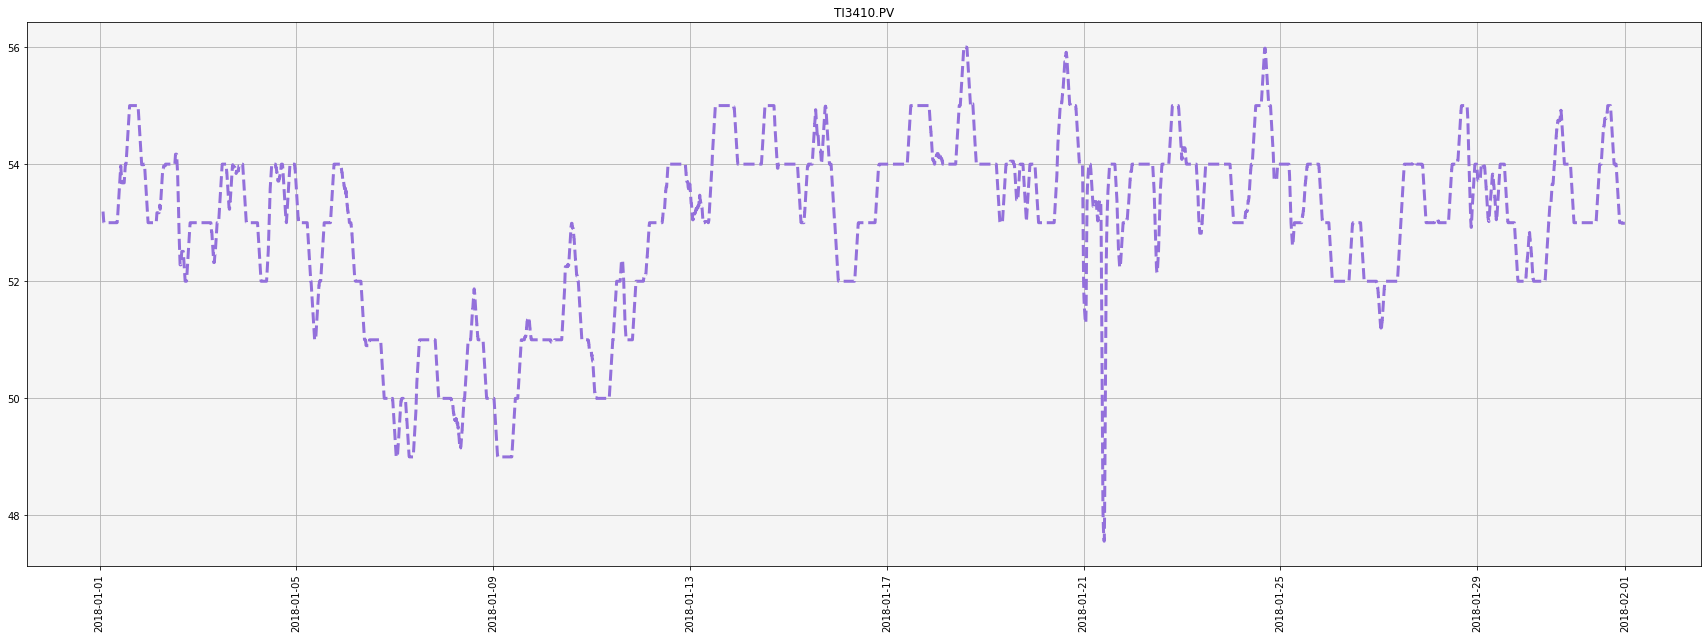

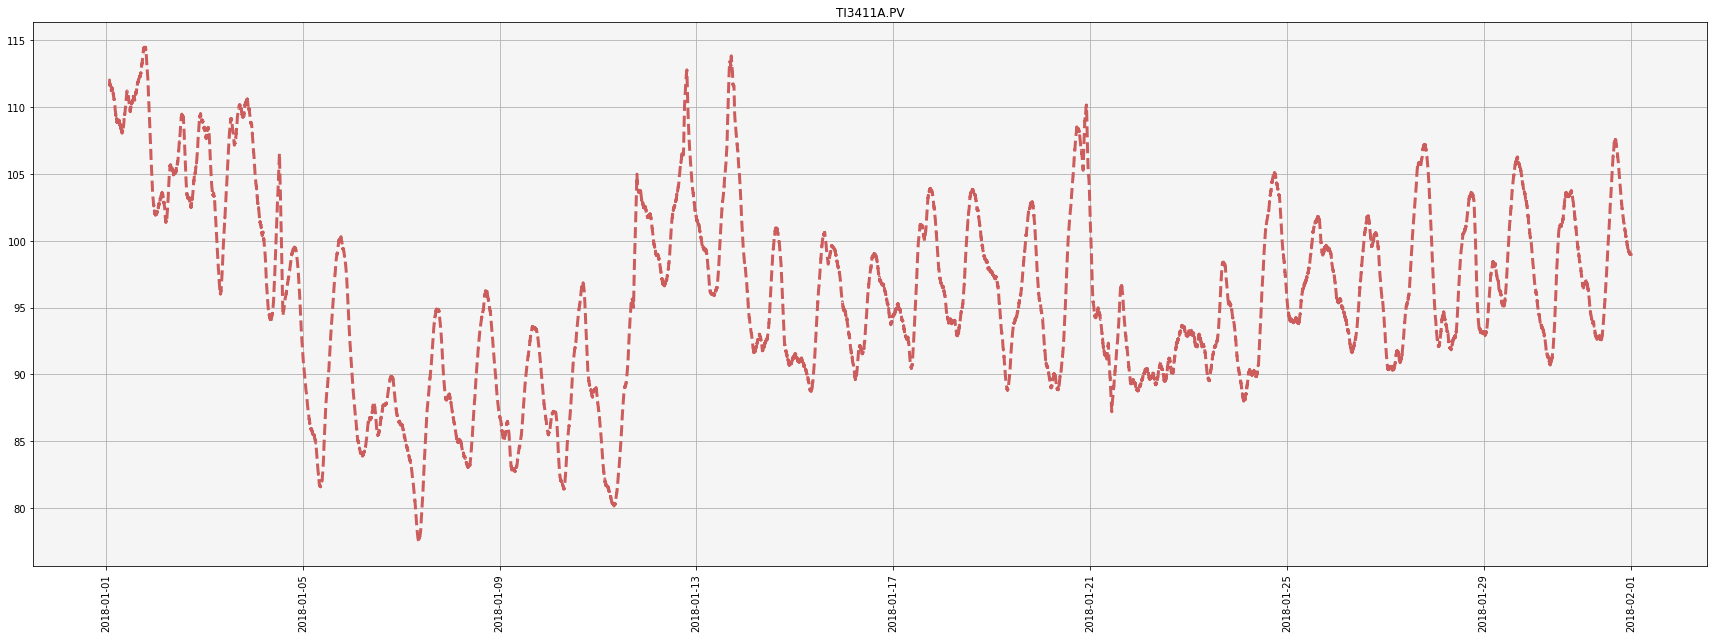

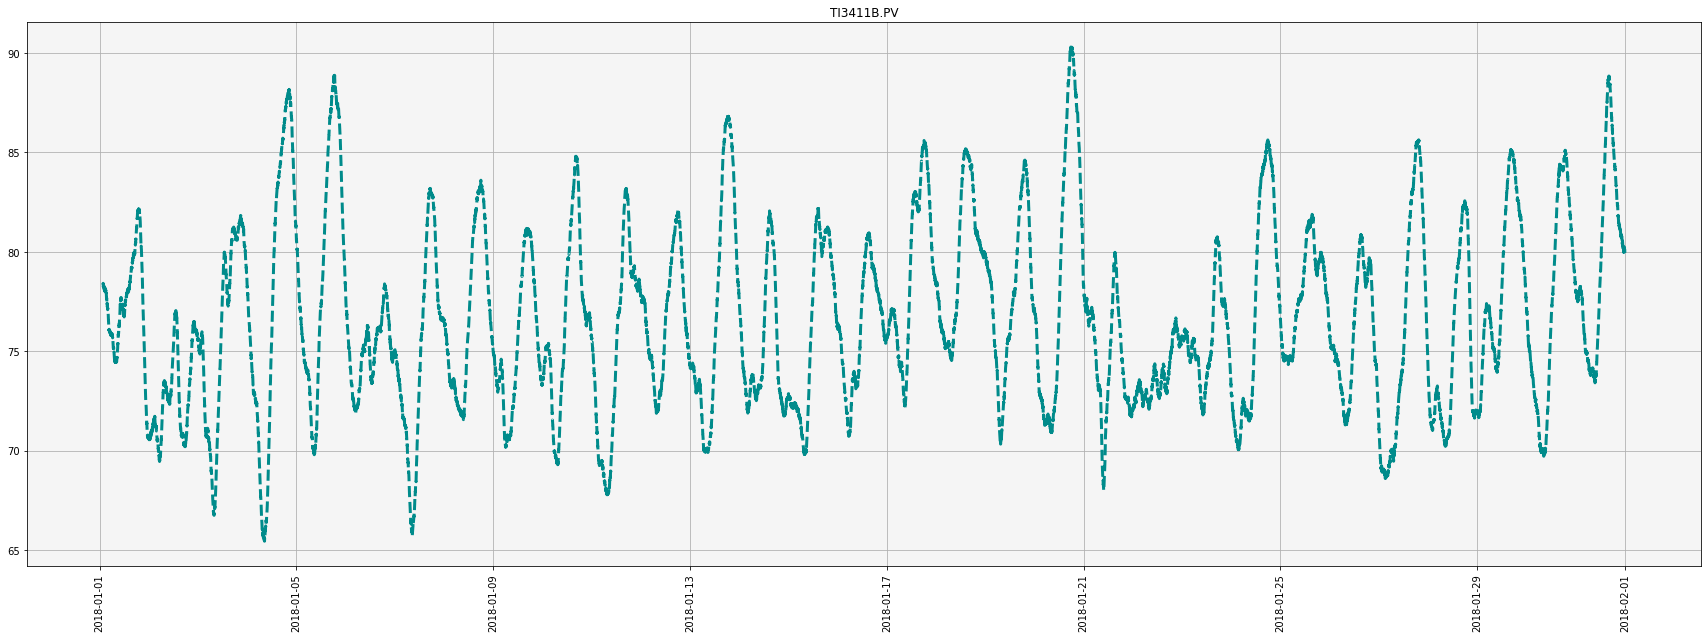

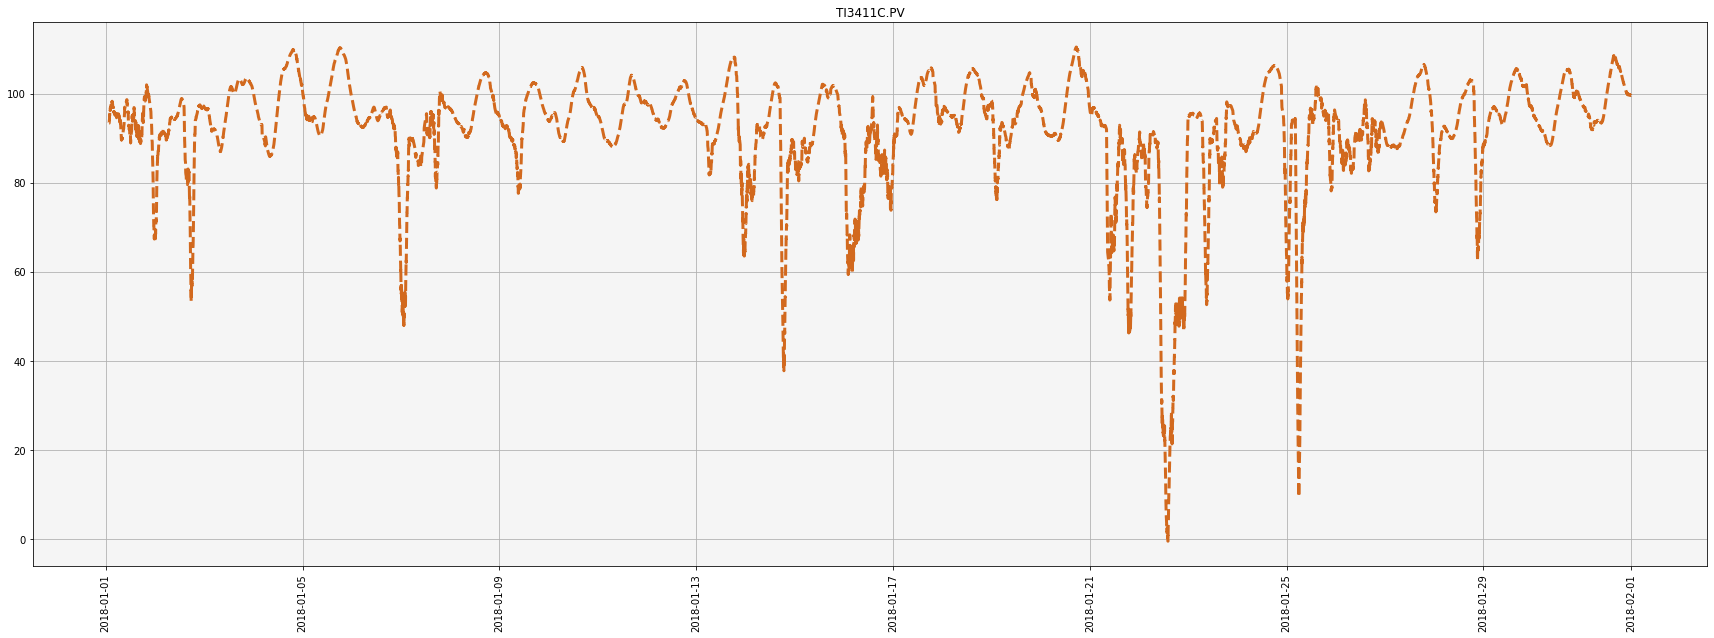

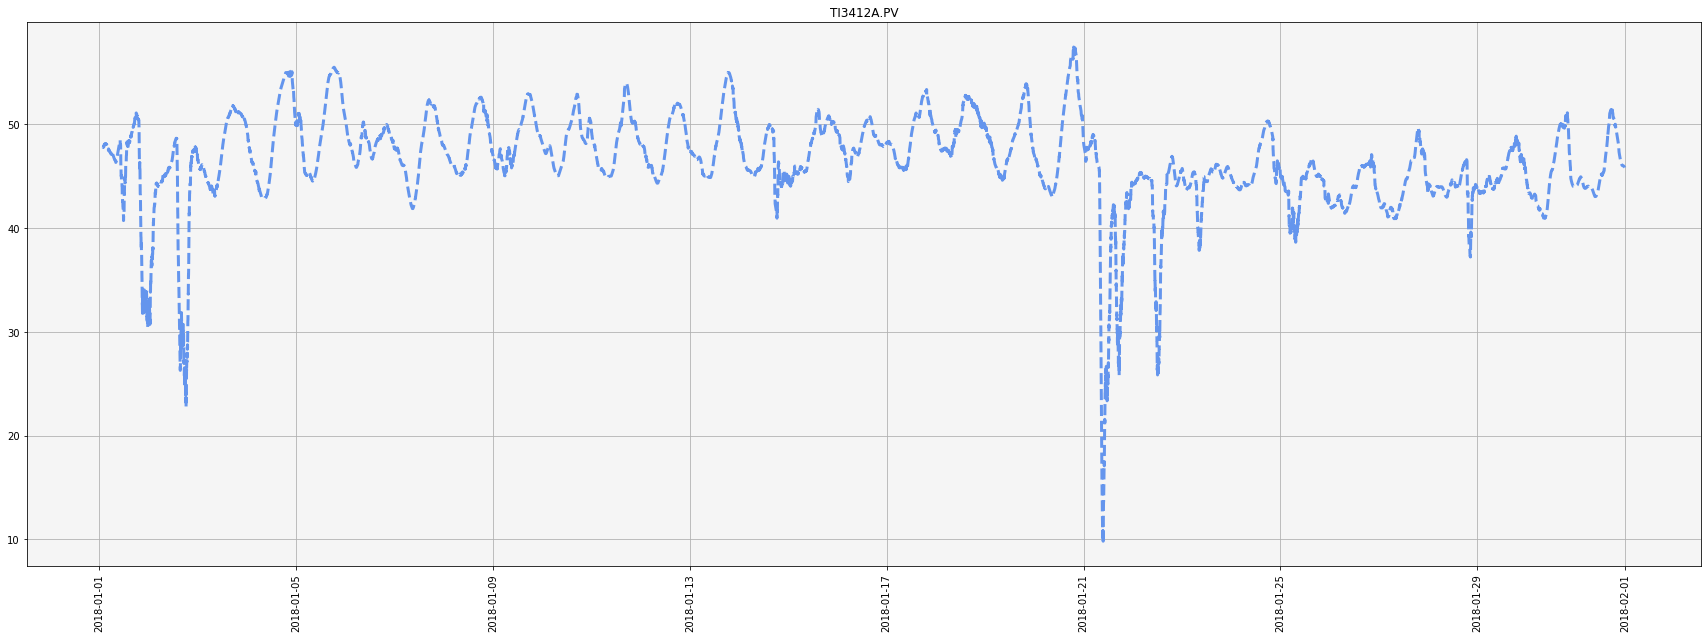

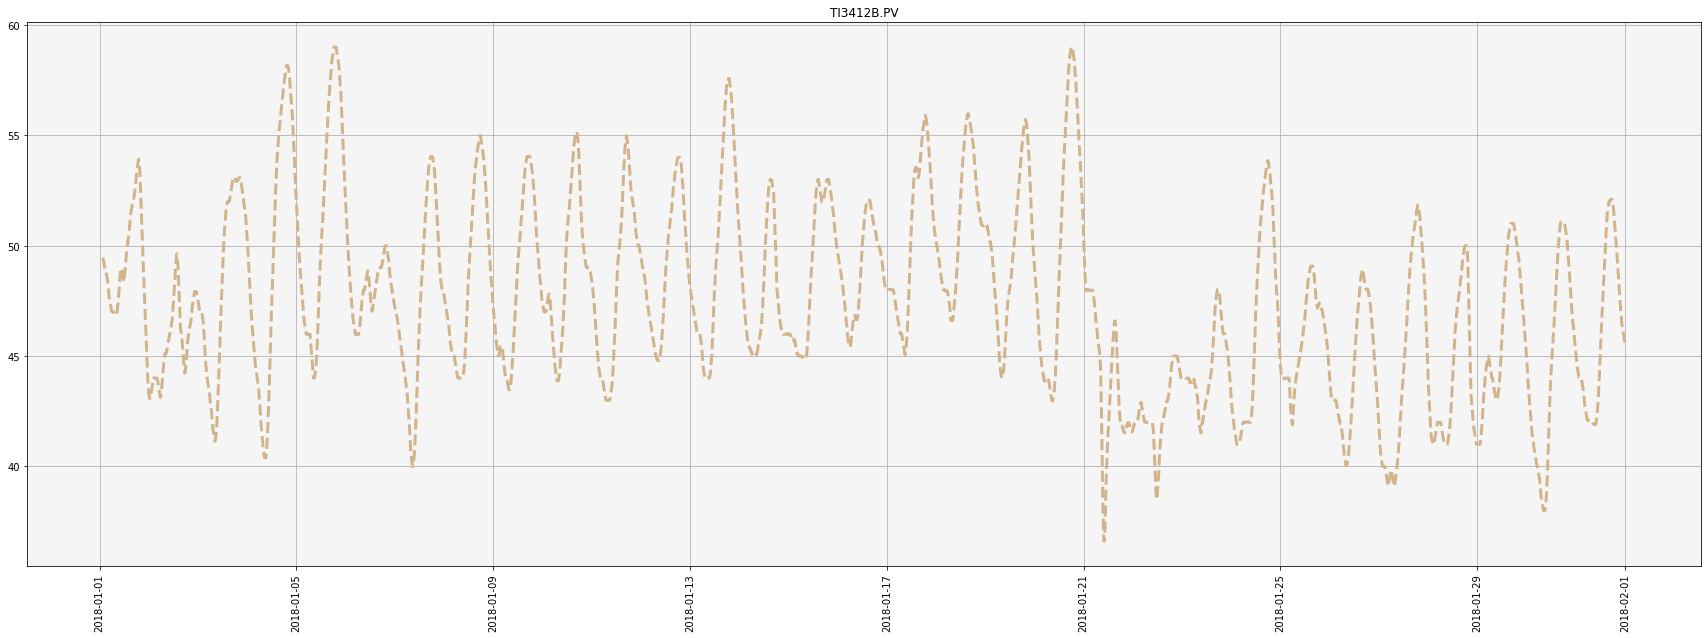

In [6]:
#Escolha das Datas de Iníco e Fim e da quantidade de pontos para a média móvel

inicio_data = '2018-01-01 00:00:00'
fim_data = '2018-02-01 00:00:00'
qtd_pontos = 100

start_date = pd.to_datetime(inicio_data,format="%Y/%m/%d %H:%M:%S")
end_date = pd.to_datetime(fim_data,format="%Y/%m/%d %H:%M:%S")

dfw_filtered = df[tags_temp['302A']][(df.index > start_date) & (df.index < end_date) ].rolling(window = qtd_pontos).mean();

colors = ['darkorange', 'darkgreen', 'royalblue', 'salmon', 'firebrick','teal','sandybrown',
          'dodgerblue', 'crimson', 'darkolivegreen', 'skyblue', 'mediumpurple','indianred', 
          'darkcyan', 'chocolate', 'cornflowerblue', 'tan', 'darkblue', 'gold', 'darkgray']

#Plotagem da Entrada
for i in range(len(tags_temp['302A'])):
    fig , ax = plt.subplots(figsize = [30, 10]);
    ax.set_facecolor(color = 'whitesmoke')
    ax.set_title(tags_temp['302A'][i])
    ax.plot(dfw_filtered[tags_temp['302A'][i]], color = colors[i], lw = 3, linestyle = '--')
    ax.xaxis.set_tick_params(rotation = 90)
    ax.grid(True)
    name = tags_temp['302A'][i]
    #plt.savefig(name+'.png', dpi = 300)
    plt.show()


#### Visualizações Estatísticas

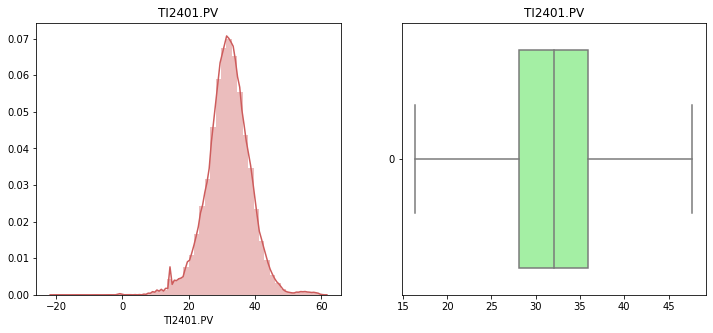

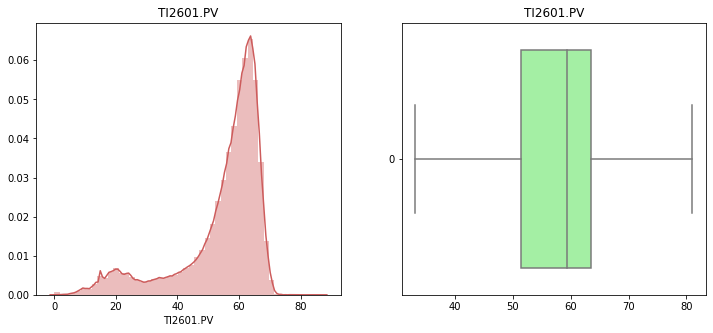

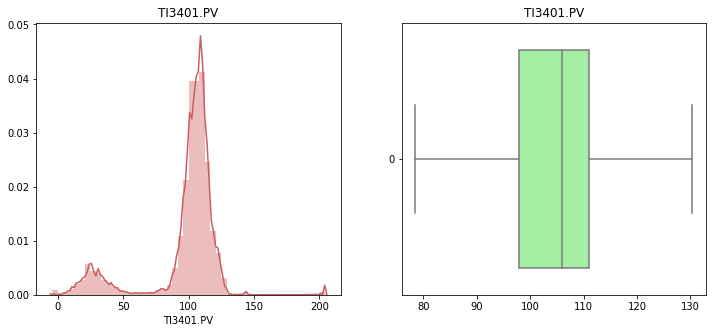

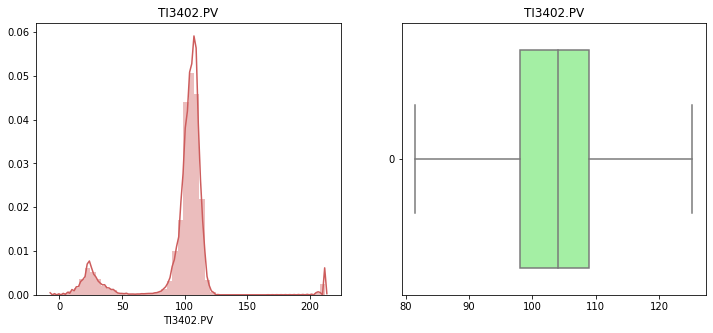

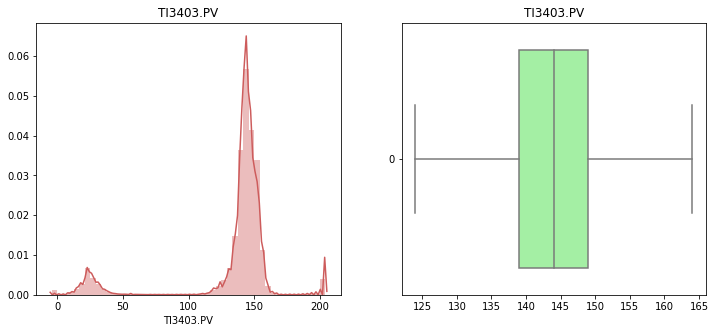

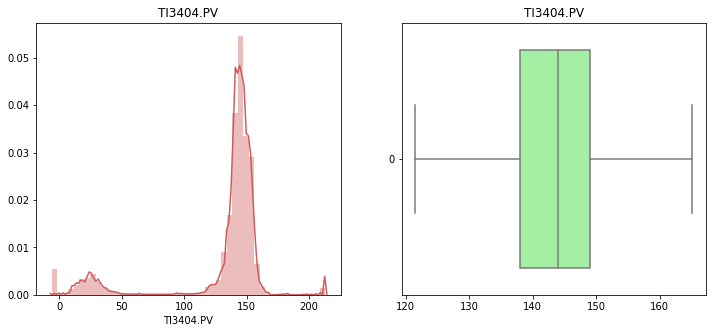

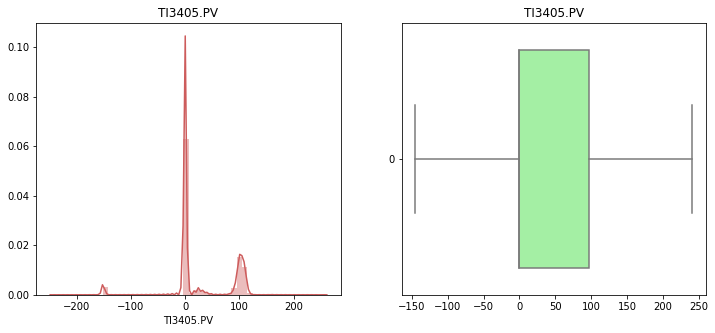

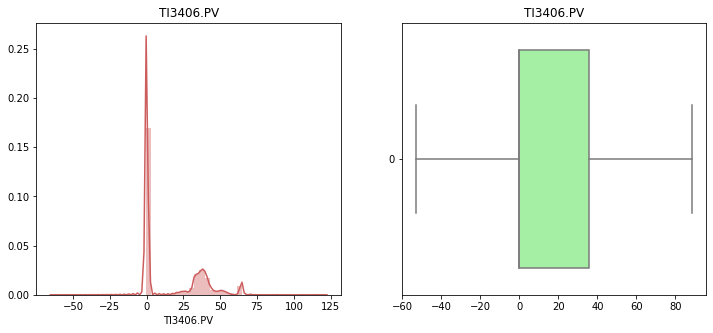

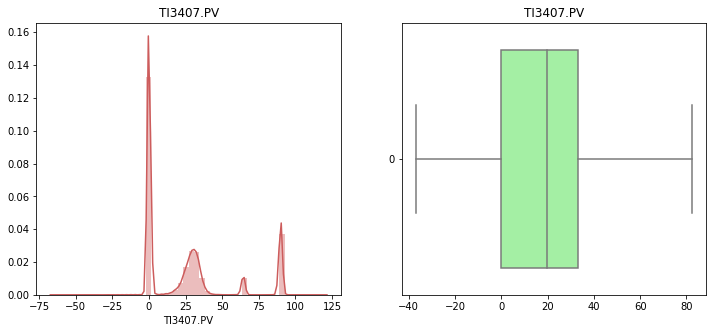

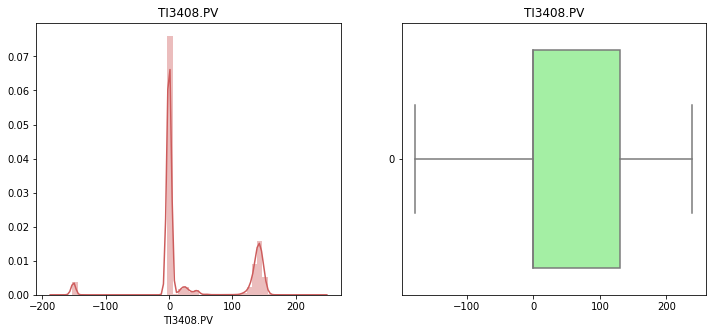

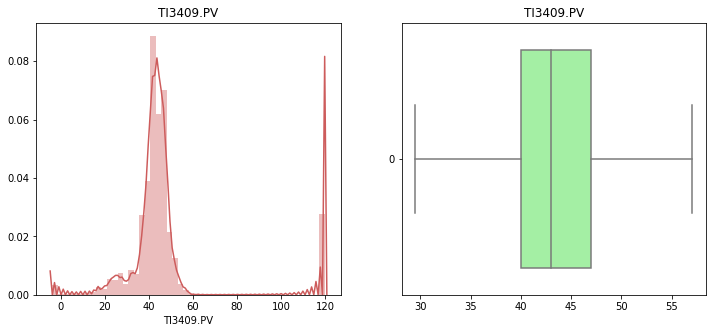

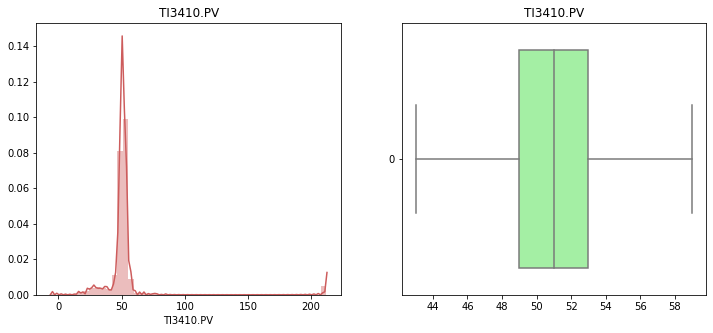

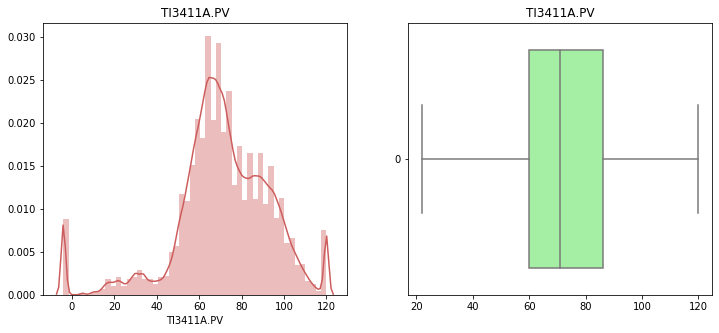

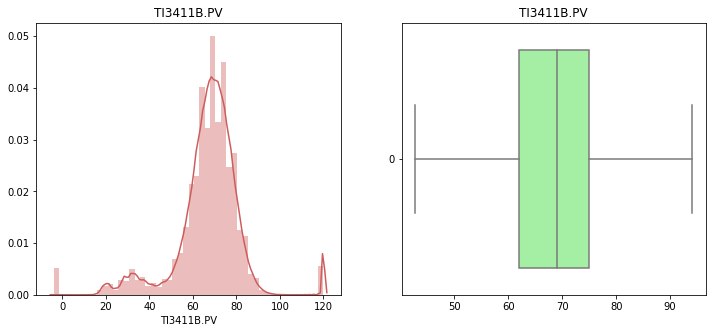

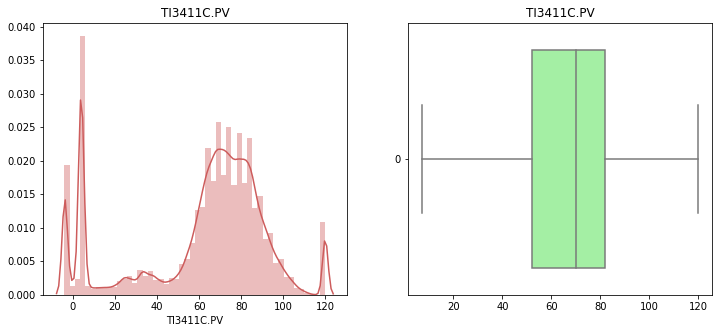

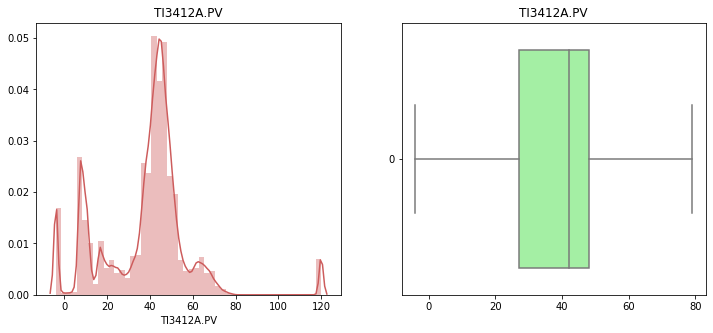

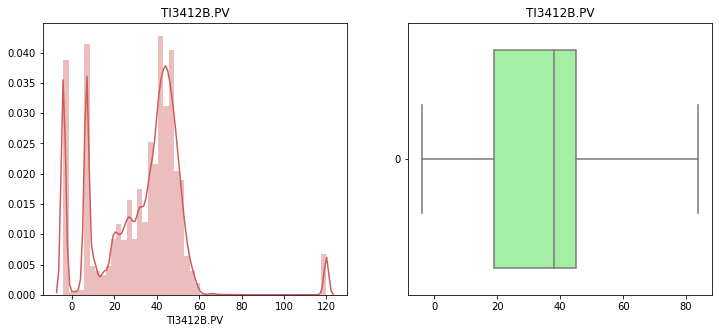

In [7]:
df_plot = df.dropna(axis = 1, how = 'all')

for i in range(len(tags_temp['302A'])):
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(tags_temp['302A'][i])
    axes[1].set_title(tags_temp['302A'][i])
    sns.distplot(df_plot[tags_temp['302A'][i]].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_plot[tags_temp['302A'][i]].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

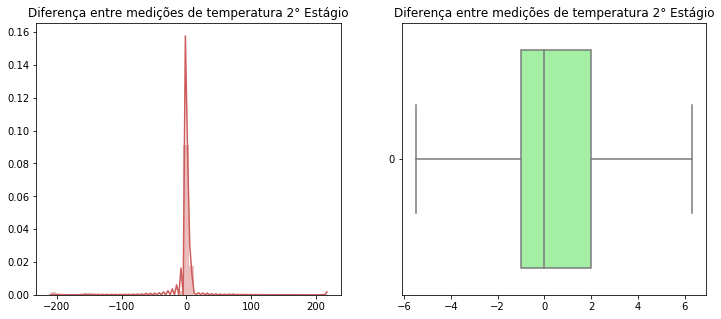

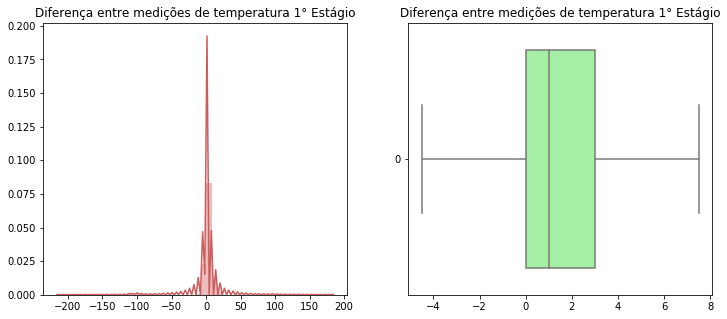

In [8]:
y = df['TI3404.PV'] - df['TI3403.PV']
f, axes = plt.subplots(1, 2, figsize = [12, 5])
axes[0].set_title('Diferença entre medições de temperatura 2° Estágio')
axes[1].set_title('Diferença entre medições de temperatura 2° Estágio')
sns.distplot(y.dropna(),ax = axes[0], color = 'indianred')
sns.boxplot(data = y.dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

y = df['TI3401.PV'] - df['TI3402.PV']
f, axes = plt.subplots(1, 2, figsize = [12, 5])
axes[0].set_title('Diferença entre medições de temperatura 1° Estágio')
axes[1].set_title('Diferença entre medições de temperatura 1° Estágio')
sns.distplot(y.dropna(),ax = axes[0], color = 'indianred')
sns.boxplot(data = y.dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

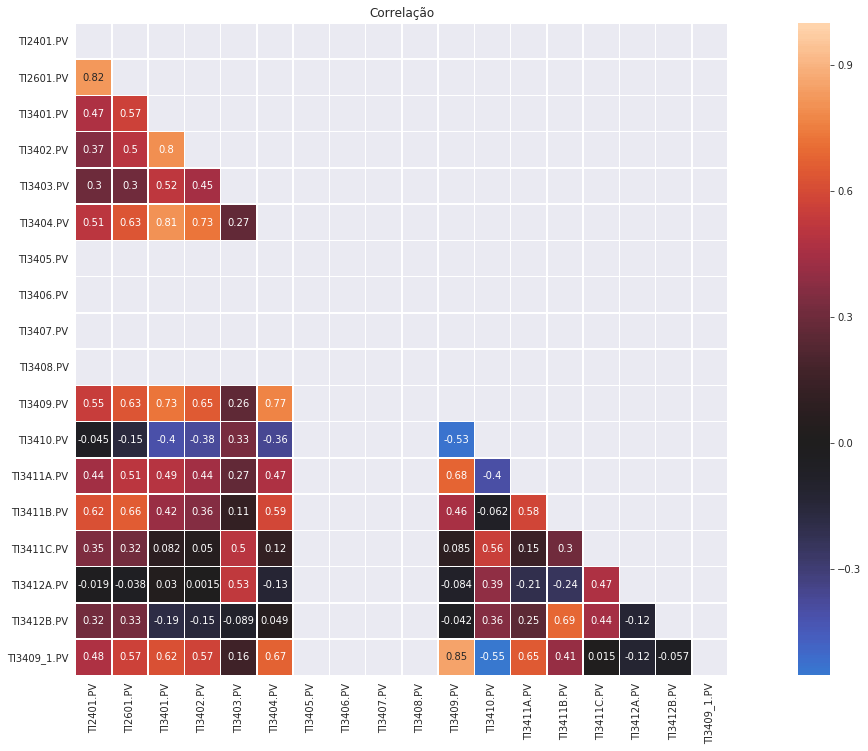

In [9]:
inicio_data = '2018-01-01 00:00:00'
fim_data = '2019-01-01 00:00:00'

predict_1 = 'TI3409_1.PV'
df[predict_1] = df['TI3409.PV'].shift(1000)
df_plot = df.dropna(axis = 1, how = 'all')

start_date = pd.to_datetime(inicio_data,format="%Y/%m/%d %H:%M:%S")
end_date = pd.to_datetime(fim_data,format="%Y/%m/%d %H:%M:%S")

if predict_1 not in tags_temp['302A']:
    tags_temp['302A'].append(predict_1)

corr = df_plot[tags_temp['302A']][(df_plot.index >= start_date) & (df_plot.index <= end_date)].dropna().corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style('dark'):
    plt.figure(figsize = [25, 12])
    plt.title('Correlação')
    sns.heatmap(corr, mask = mask, center = 0, annot = True, square = True, linewidths = .5)
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 0) 

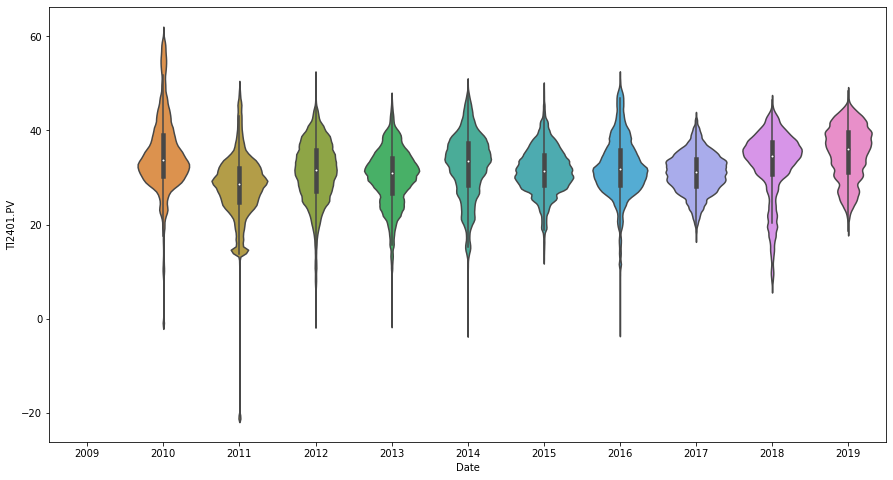

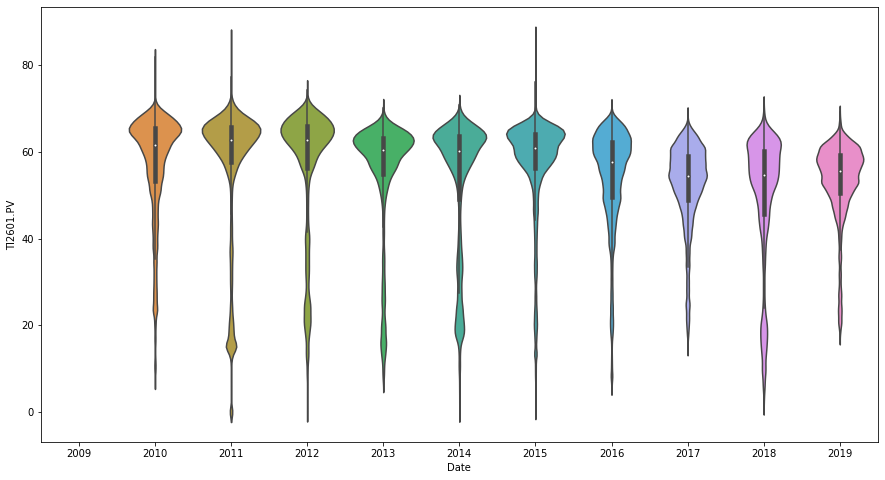

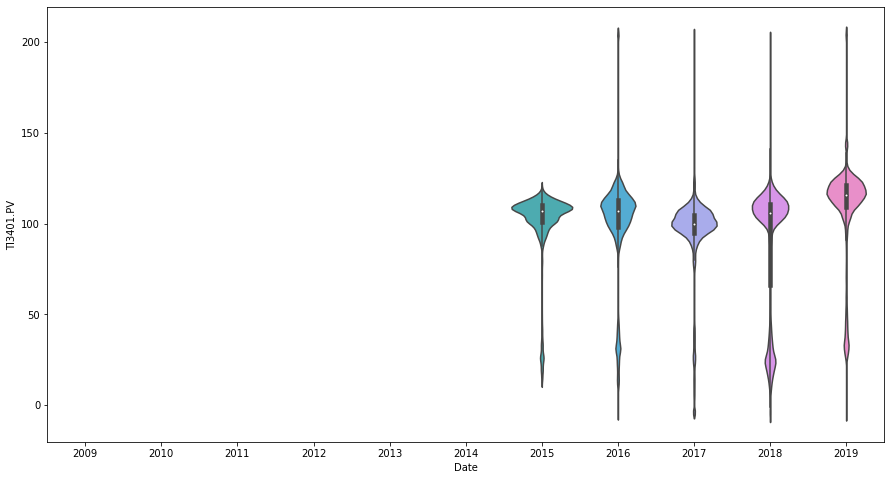

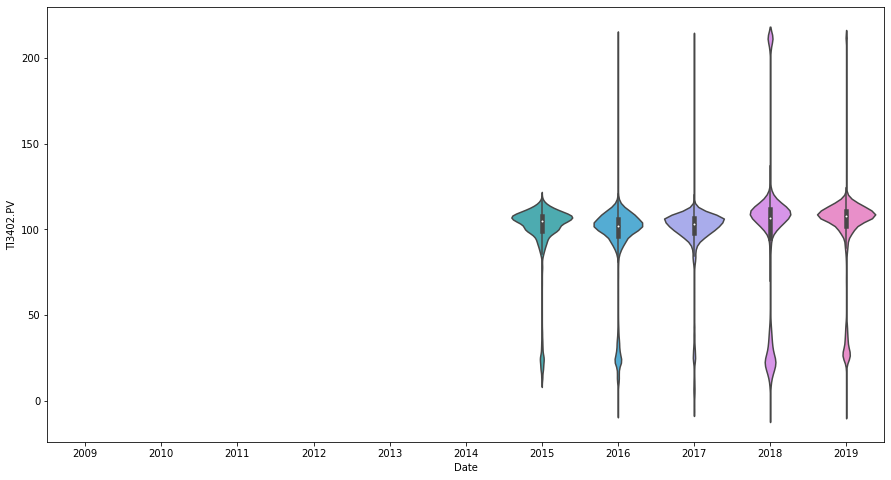

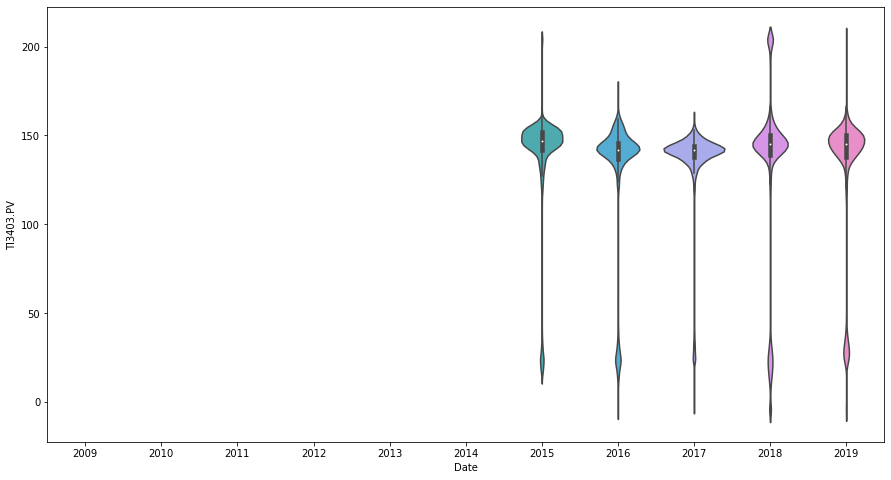

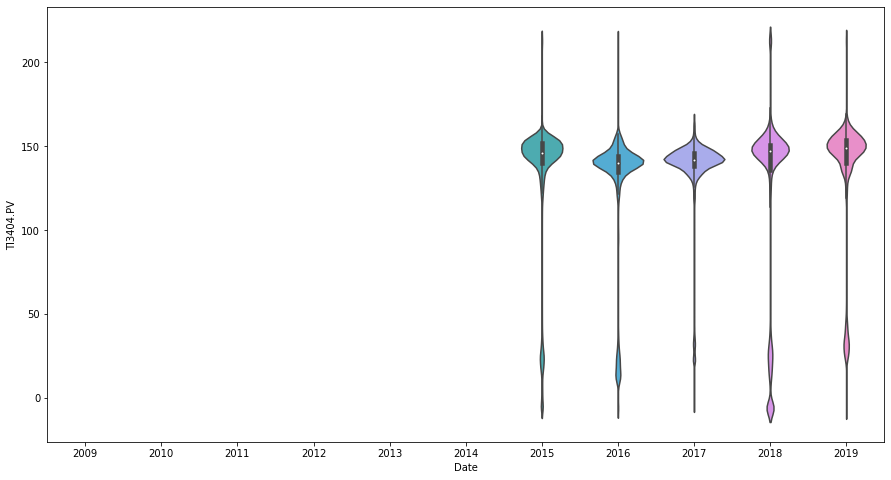

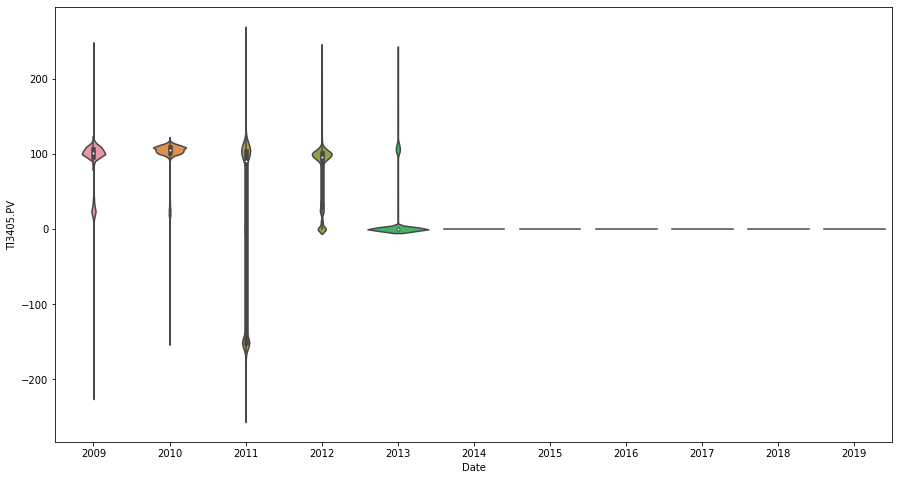

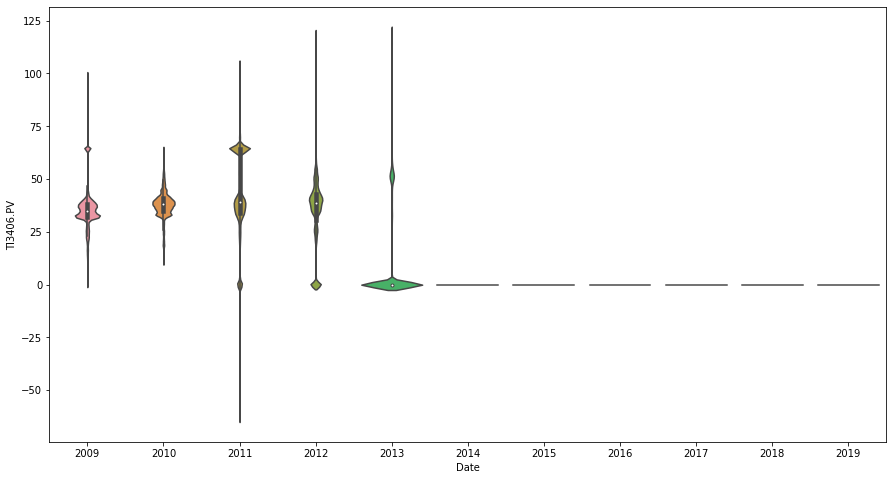

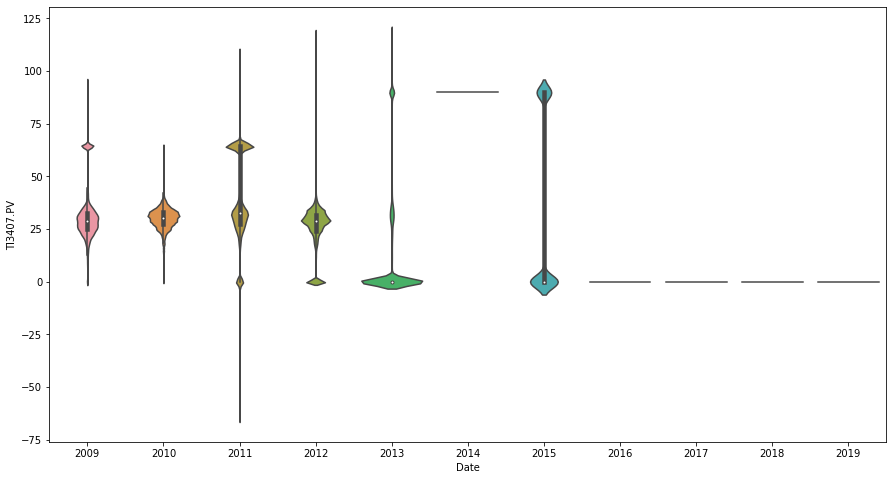

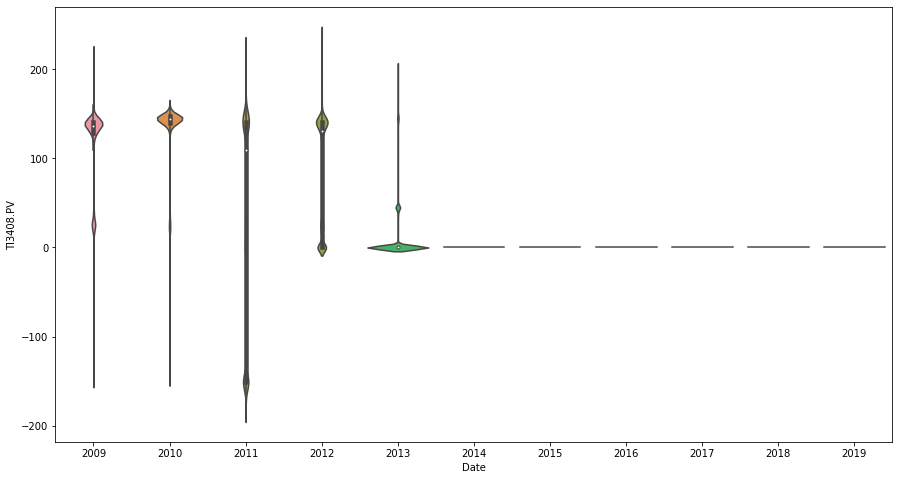

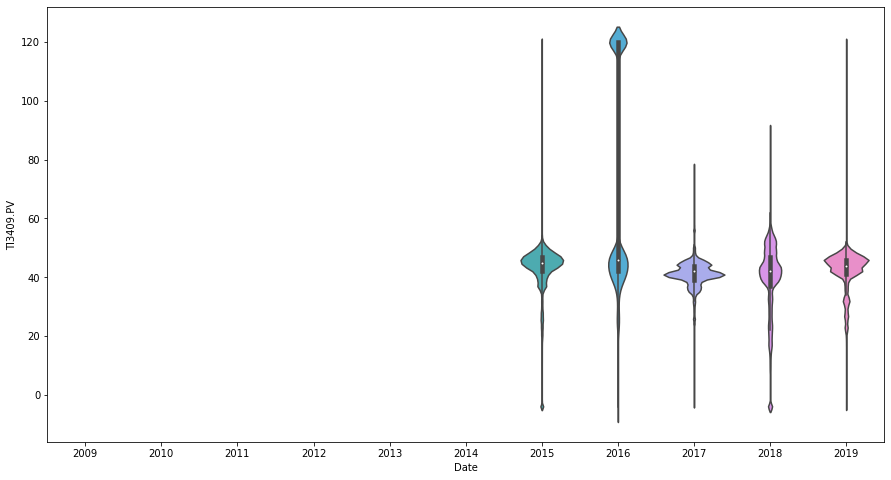

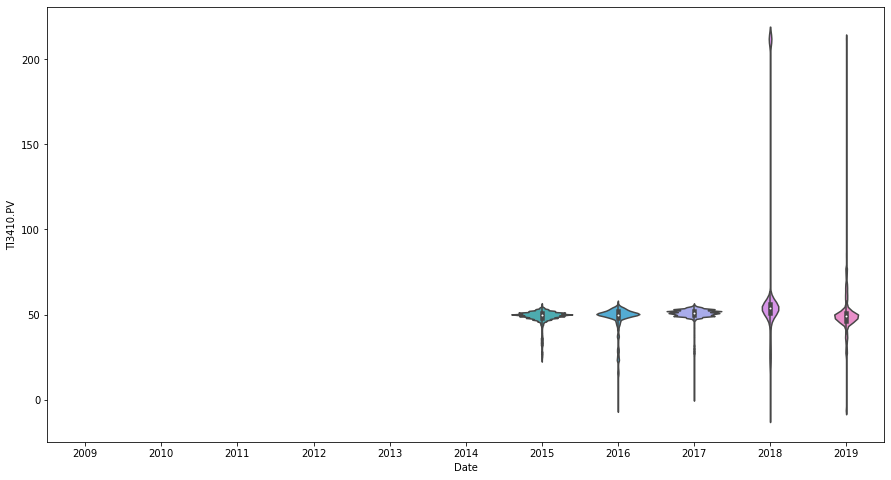

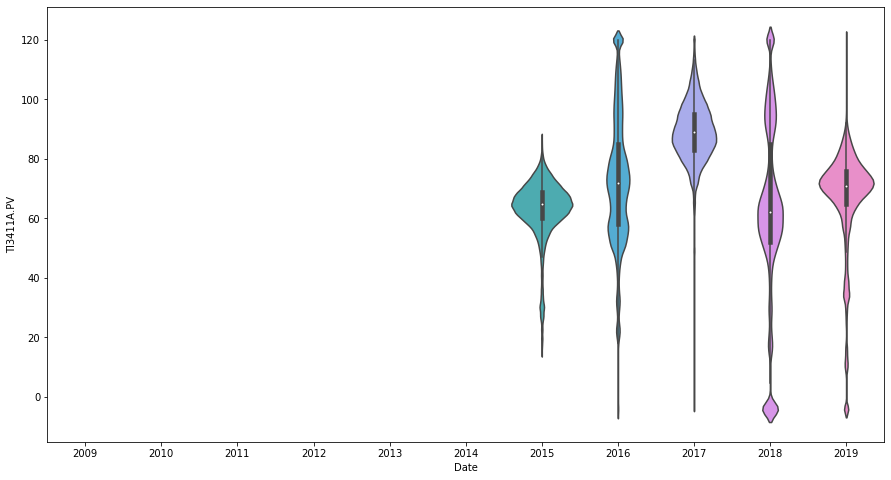

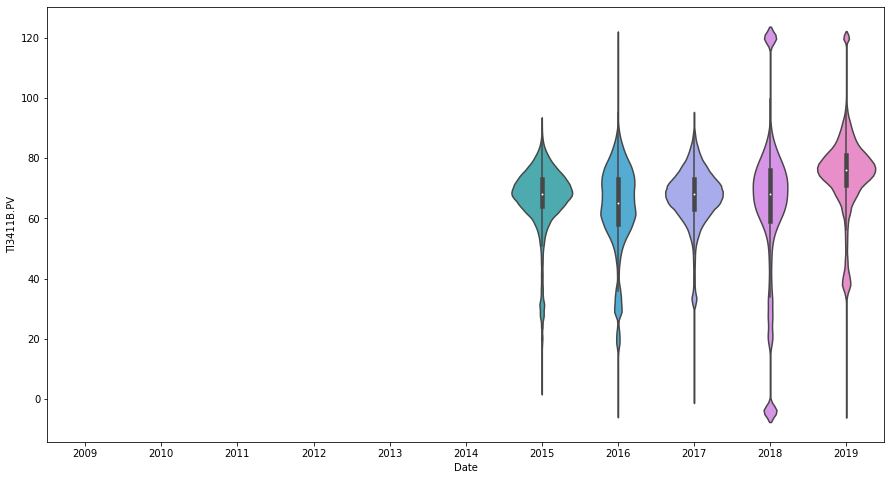

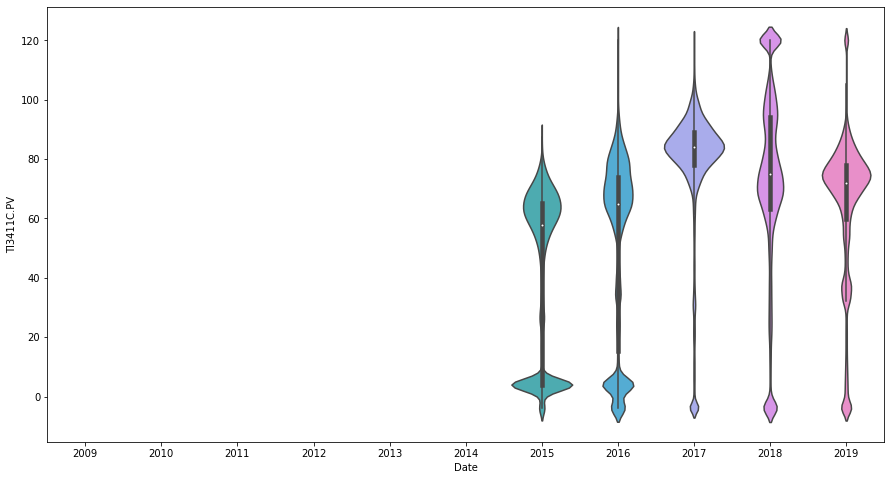

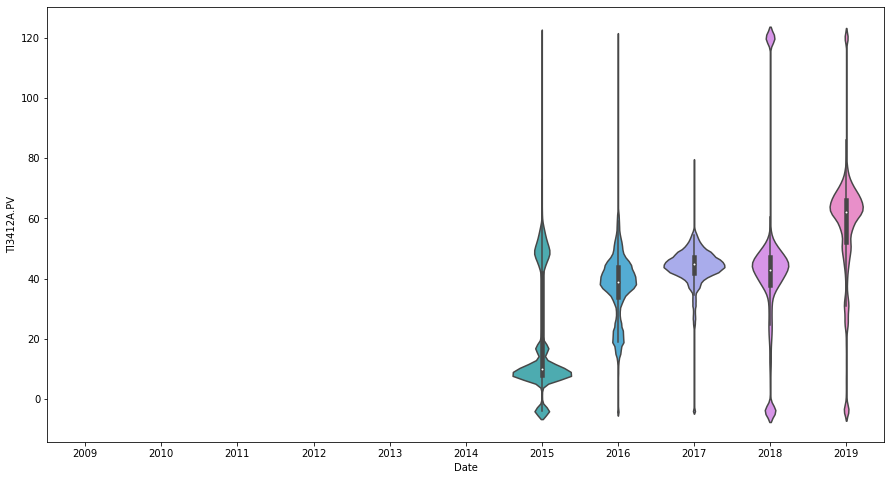

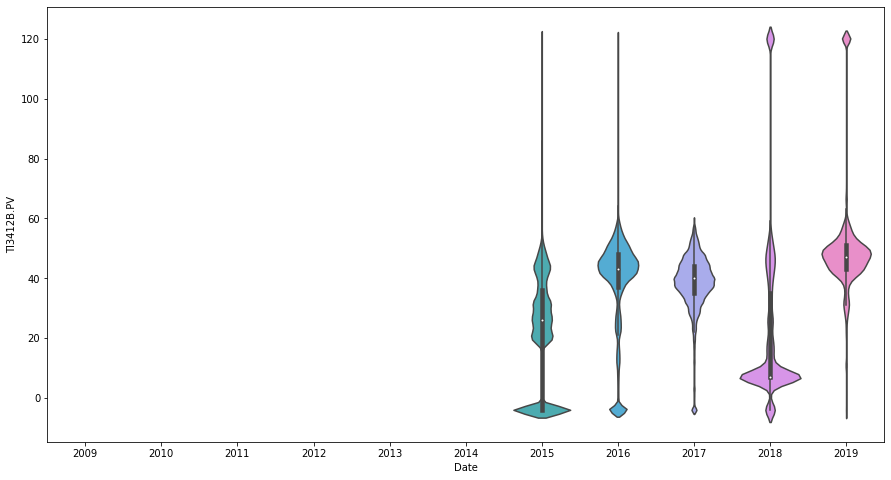

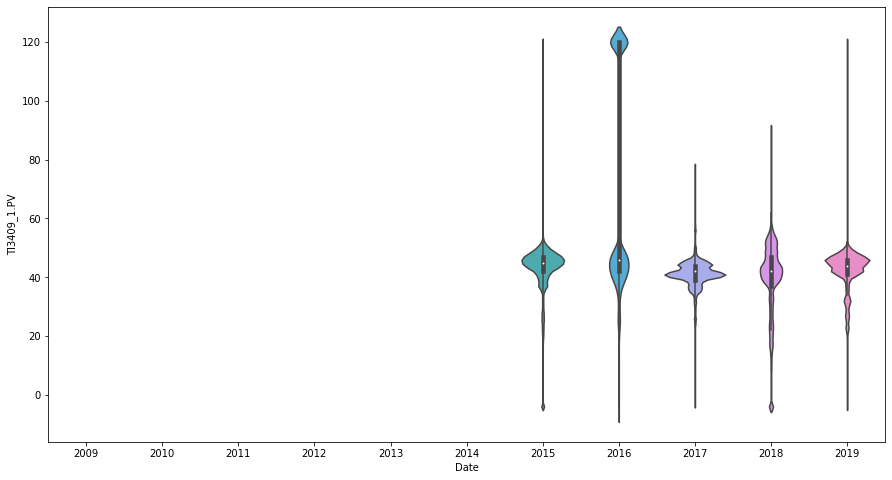

In [10]:
for i in tags_temp['302A']:
    plt.figure(figsize = (15, 8))
    sns.violinplot(x = df.index.year, y = i, data = df)
    name = i+' ao longo dos anos'
    #plt.savefig('./figuras/'+name+'.png', dpi = 300)
    plt.show()

####  Seleção dos Dados:
#### Dados a partir de 2015
####  Não utilizar TI3411B.PV, TI3411C.PV, TI3405.PV, TI3406.PV, TI3407.PV, TI3408.PV, TI3412A.PV, TI3412B.PV, TI3410.PV, TI3403.PV
####  -6 $\leq$ TI3404.PV - TI3403.PV  $\leq$ 6
#### 100 $\leq$ TI3404.PV $\leq$ 170
####  20 $\leq$ TI3411A.PV $\leq$ 120
####  18 $\leq$ TI3409.PV $\leq$  60

In [12]:
tags_temp['302A']

['TI2401.PV',
 'TI2601.PV',
 'TI3401.PV',
 'TI3402.PV',
 'TI3403.PV',
 'TI3404.PV',
 'TI3405.PV',
 'TI3406.PV',
 'TI3407.PV',
 'TI3408.PV',
 'TI3409.PV',
 'TI3410.PV',
 'TI3411A.PV',
 'TI3411B.PV',
 'TI3411C.PV',
 'TI3412A.PV',
 'TI3412B.PV',
 'TI3409_1.PV']

In [13]:
df_use = df[tags_temp['302A']].copy()
df_use = df_use[df_use.index.year >= 2015]
df_use = df_use[((df_use['TI3404.PV'] - df_use['TI3403.PV']) >= -6) & ((df_use['TI3404.PV'] - df_use['TI3403.PV']) <= 6)]
df_use = df_use[(df_use['TI3404.PV']  >= 100)  & (df_use['TI3404.PV']  <=  150)]
df_use = df_use[(df_use['TI3411A.PV'] >=  20) & (df_use['TI3411A.PV'] <=  120)]
df_use = df_use[(df_use['TI3409.PV'] >=  18) & (df_use['TI3409.PV'] <=  60)]
df_use.drop(columns = ['TI3411B.PV', 'TI3411C.PV', 'TI3405.PV', 'TI3406.PV', 'TI3407.PV', 'TI3408.PV', 'TI3412A.PV', 'TI3412B.PV', 'TI3410.PV', 'TI3403.PV'], inplace = True)

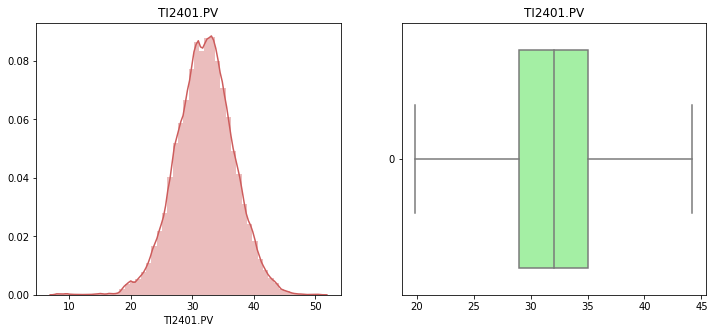

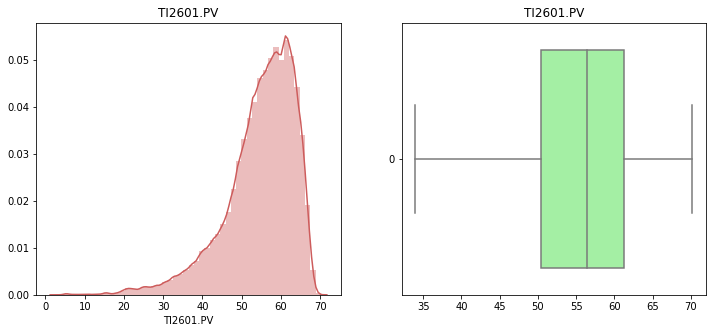

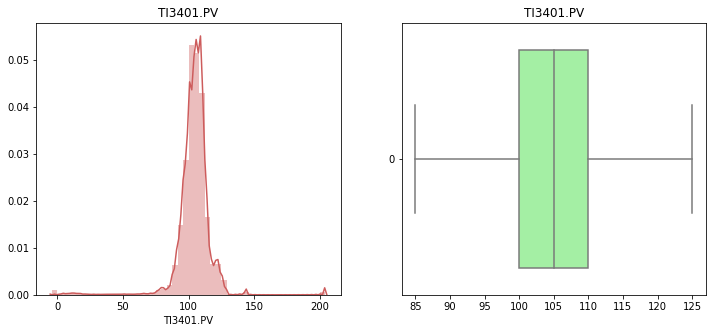

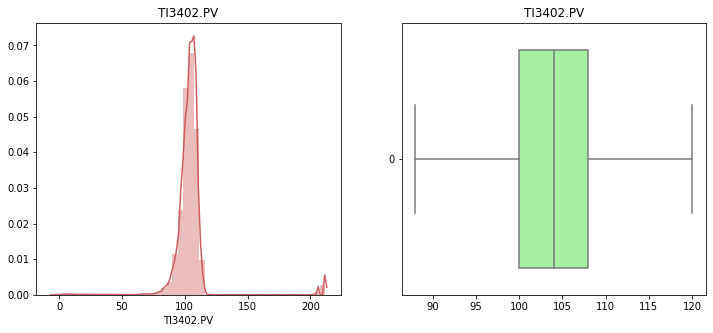

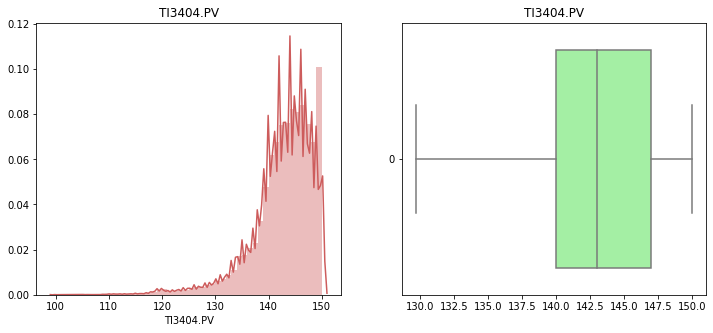

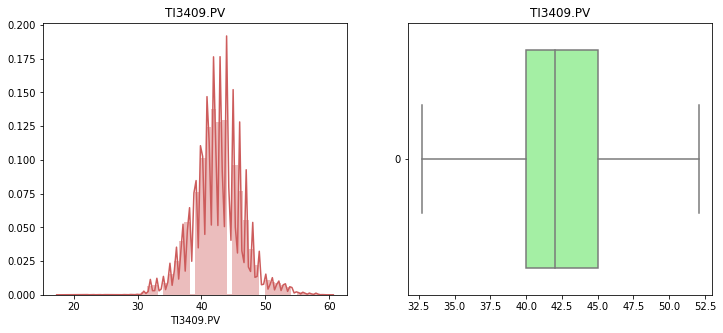

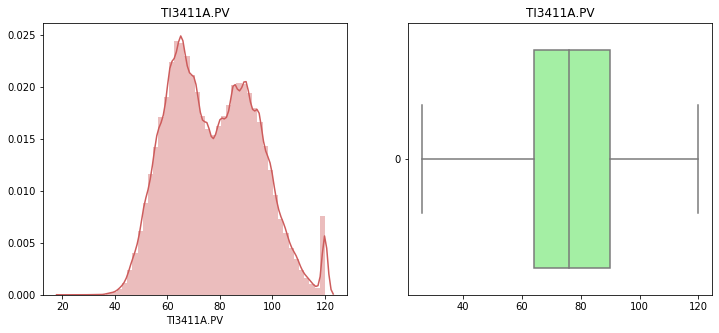

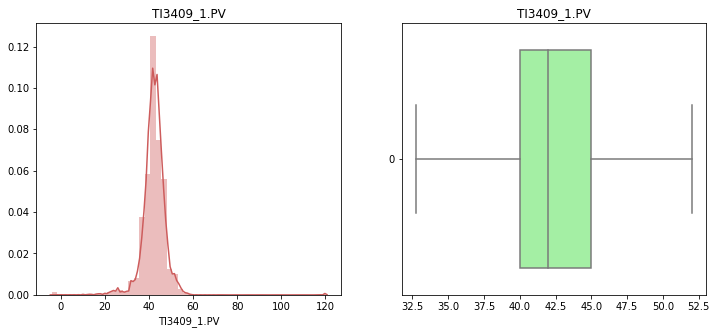

In [14]:
for i in df_use.columns:
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(i)
    axes[1].set_title(i)
    sns.distplot(df_use[i].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_use[i].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

In [15]:
df_use.to_csv(output_path+'df_temperatura_filtrada.csv.gz', compression = 'gzip')